# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
import sys
sys.executable

'C:\\Anaconda\\envs\\chatbot\\python.exe'

In [2]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [3]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [4]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027206479e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [5]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.79856129989e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [6]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    #print(param_grad_num / grads[param_name])
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

b1 max relative error: 2.738420e-09
W2 max relative error: 3.440708e-09
W1 max relative error: 3.561318e-09
b2 max relative error: 3.865091e-11


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.0156349876119


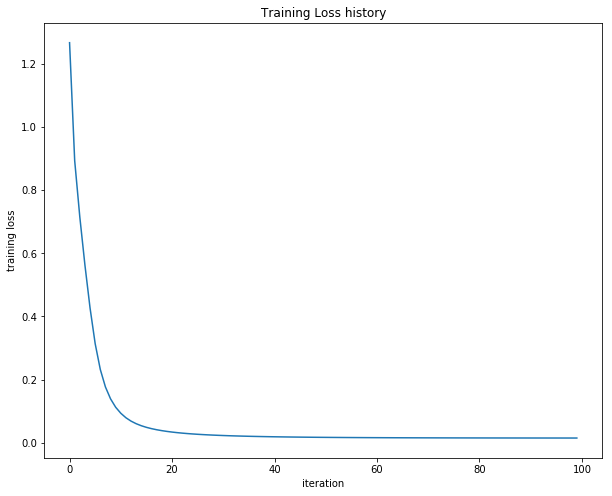

In [12]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [13]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [17]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302980
iteration 100 / 1000: loss 2.302519
iteration 200 / 1000: loss 2.295712
iteration 300 / 1000: loss 2.273006
iteration 400 / 1000: loss 2.181121
iteration 500 / 1000: loss 2.094235
iteration 600 / 1000: loss 2.083310
iteration 700 / 1000: loss 2.004376
iteration 800 / 1000: loss 2.073568
iteration 900 / 1000: loss 1.958835
Validation accuracy:  0.283


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

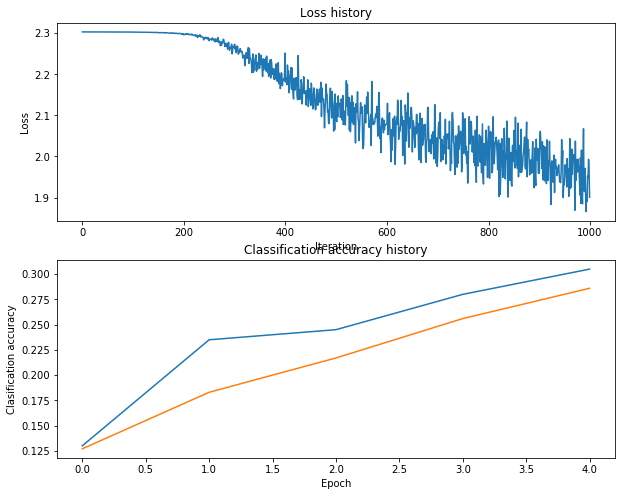

In [18]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

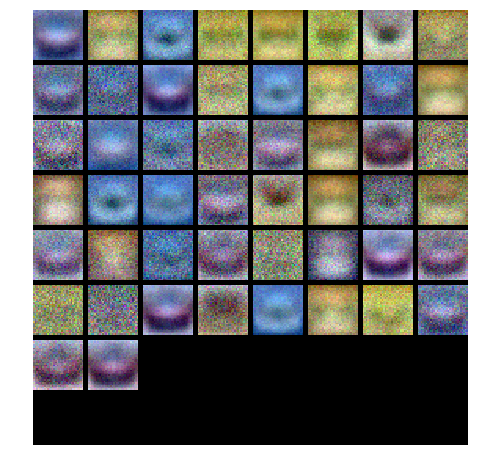

In [19]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [21]:
import itertools as it

iteration 0 / 1000: loss 2.302751
iteration 100 / 1000: loss 2.302693
iteration 200 / 1000: loss 2.302589
iteration 300 / 1000: loss 2.302460
iteration 400 / 1000: loss 2.302183
iteration 500 / 1000: loss 2.301805
iteration 600 / 1000: loss 2.300949
iteration 700 / 1000: loss 2.297821
iteration 800 / 1000: loss 2.294353
iteration 900 / 1000: loss 2.288079


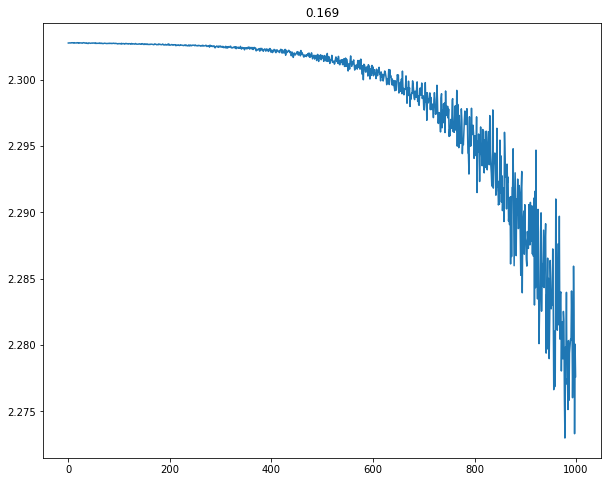

iteration 0 / 1000: loss 2.302775
iteration 100 / 1000: loss 2.302692
iteration 200 / 1000: loss 2.302648
iteration 300 / 1000: loss 2.302540
iteration 400 / 1000: loss 2.302239
iteration 500 / 1000: loss 2.301938
iteration 600 / 1000: loss 2.301273
iteration 700 / 1000: loss 2.301005
iteration 800 / 1000: loss 2.298899
iteration 900 / 1000: loss 2.296376


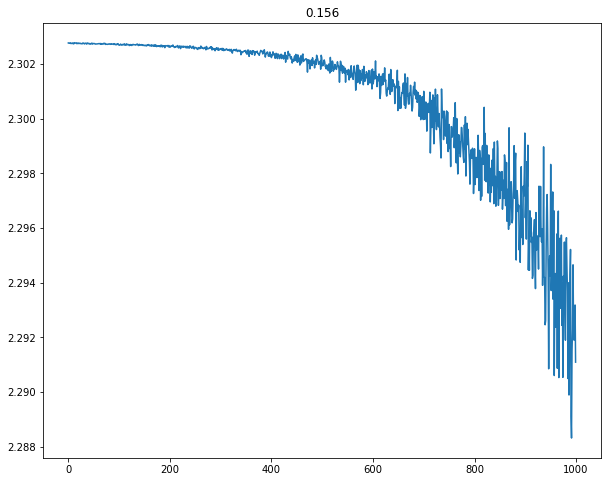

iteration 0 / 1000: loss 2.302757
iteration 100 / 1000: loss 2.302706
iteration 200 / 1000: loss 2.302636
iteration 300 / 1000: loss 2.302537
iteration 400 / 1000: loss 2.302353
iteration 500 / 1000: loss 2.301958
iteration 600 / 1000: loss 2.301302
iteration 700 / 1000: loss 2.299931
iteration 800 / 1000: loss 2.299655
iteration 900 / 1000: loss 2.299633


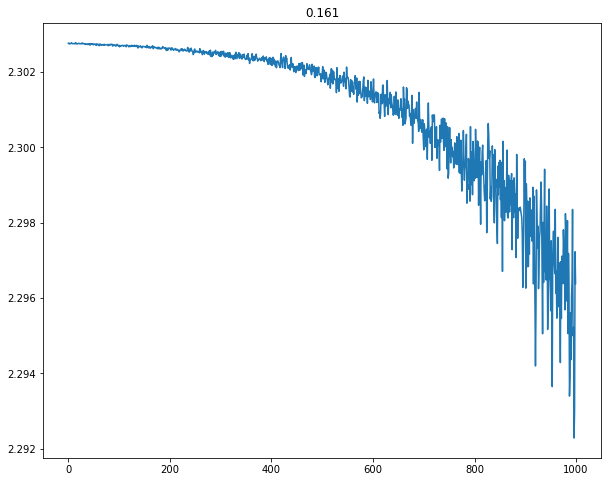

iteration 0 / 1000: loss 2.302881
iteration 100 / 1000: loss 2.302835
iteration 200 / 1000: loss 2.302744
iteration 300 / 1000: loss 2.302628
iteration 400 / 1000: loss 2.302478
iteration 500 / 1000: loss 2.301929
iteration 600 / 1000: loss 2.301271
iteration 700 / 1000: loss 2.299046
iteration 800 / 1000: loss 2.297900
iteration 900 / 1000: loss 2.291921


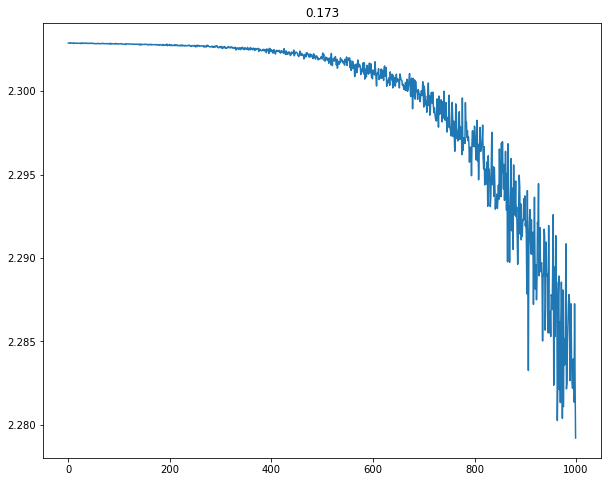

iteration 0 / 1000: loss 2.302882
iteration 100 / 1000: loss 2.302847
iteration 200 / 1000: loss 2.302773
iteration 300 / 1000: loss 2.302735
iteration 400 / 1000: loss 2.302611
iteration 500 / 1000: loss 2.302085
iteration 600 / 1000: loss 2.301805
iteration 700 / 1000: loss 2.301369
iteration 800 / 1000: loss 2.298292
iteration 900 / 1000: loss 2.296490


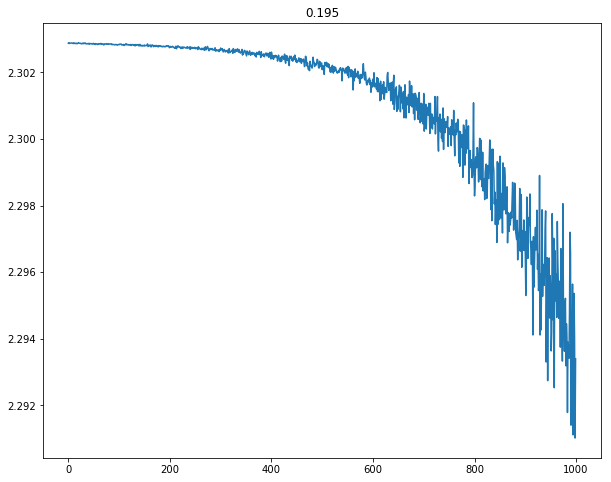

iteration 0 / 1000: loss 2.302885
iteration 100 / 1000: loss 2.302837
iteration 200 / 1000: loss 2.302790
iteration 300 / 1000: loss 2.302717
iteration 400 / 1000: loss 2.302630
iteration 500 / 1000: loss 2.302386
iteration 600 / 1000: loss 2.302075
iteration 700 / 1000: loss 2.301906
iteration 800 / 1000: loss 2.300799
iteration 900 / 1000: loss 2.299835


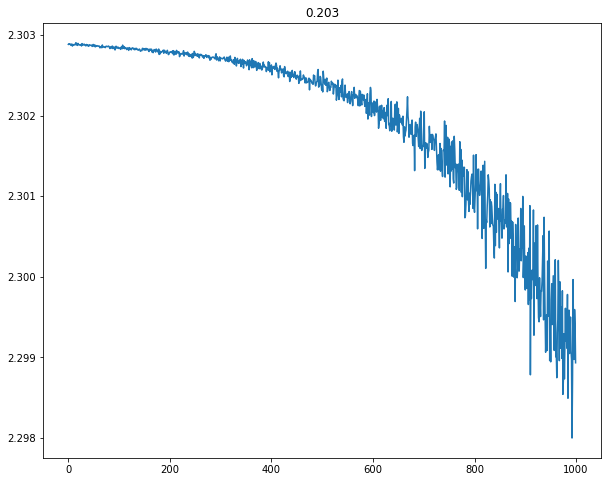

iteration 0 / 1000: loss 2.303018
iteration 100 / 1000: loss 2.302978
iteration 200 / 1000: loss 2.302882
iteration 300 / 1000: loss 2.302814
iteration 400 / 1000: loss 2.302566
iteration 500 / 1000: loss 2.302321
iteration 600 / 1000: loss 2.301438
iteration 700 / 1000: loss 2.300378
iteration 800 / 1000: loss 2.297799
iteration 900 / 1000: loss 2.288224


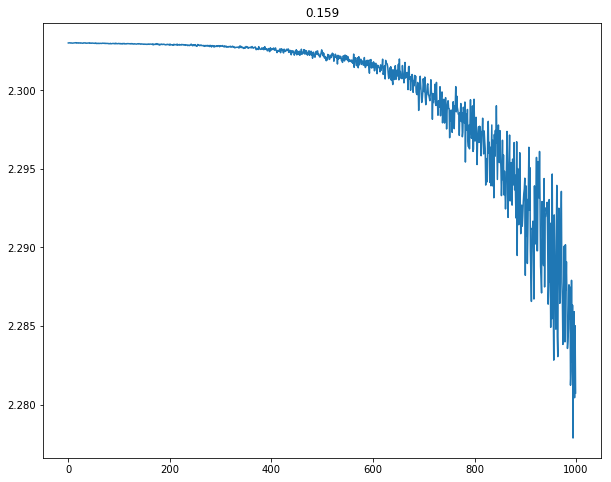

iteration 0 / 1000: loss 2.303023
iteration 100 / 1000: loss 2.302967
iteration 200 / 1000: loss 2.302895
iteration 300 / 1000: loss 2.302822
iteration 400 / 1000: loss 2.302748
iteration 500 / 1000: loss 2.302119
iteration 600 / 1000: loss 2.301448
iteration 700 / 1000: loss 2.301350
iteration 800 / 1000: loss 2.299973
iteration 900 / 1000: loss 2.297601


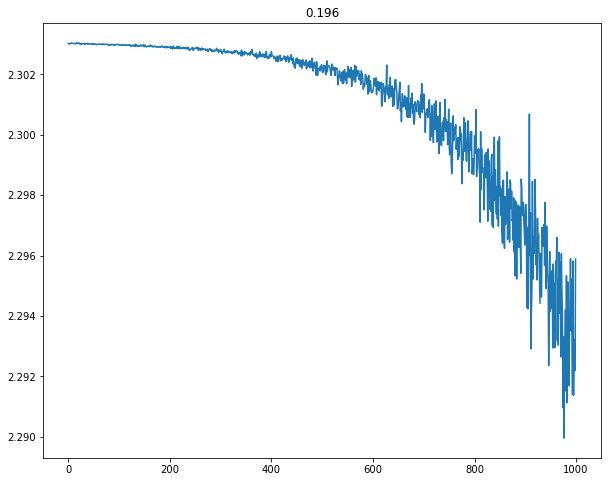

iteration 0 / 1000: loss 2.303041
iteration 100 / 1000: loss 2.302986
iteration 200 / 1000: loss 2.302928
iteration 300 / 1000: loss 2.302780
iteration 400 / 1000: loss 2.302616
iteration 500 / 1000: loss 2.302478
iteration 600 / 1000: loss 2.302132
iteration 700 / 1000: loss 2.301997
iteration 800 / 1000: loss 2.300736
iteration 900 / 1000: loss 2.300262


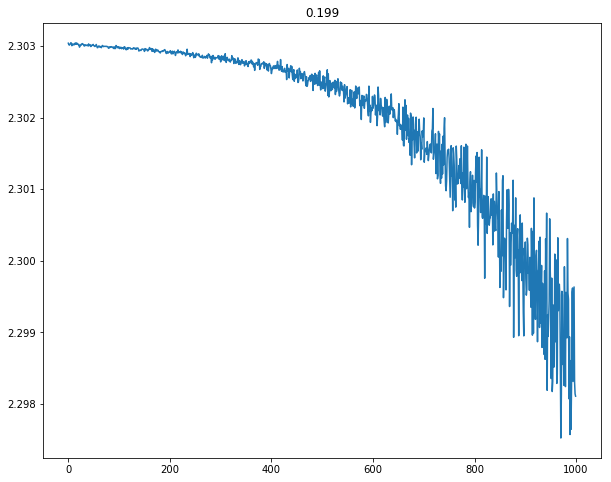

iteration 0 / 1000: loss 2.302803
iteration 100 / 1000: loss 2.302754
iteration 200 / 1000: loss 2.302595
iteration 300 / 1000: loss 2.302433
iteration 400 / 1000: loss 2.302106
iteration 500 / 1000: loss 2.301763
iteration 600 / 1000: loss 2.299770
iteration 700 / 1000: loss 2.298832
iteration 800 / 1000: loss 2.294720
iteration 900 / 1000: loss 2.282438


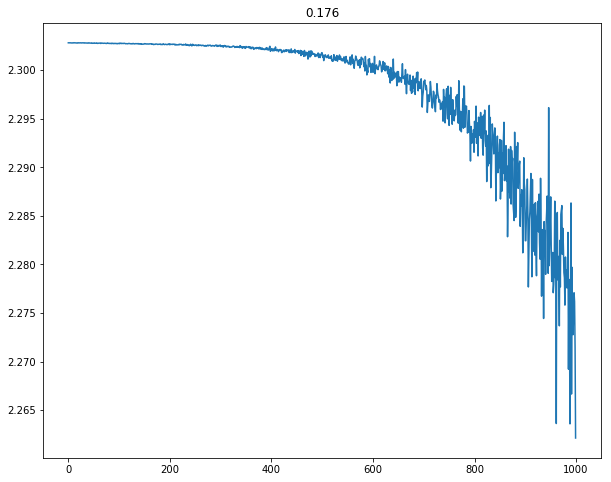

iteration 0 / 1000: loss 2.302805
iteration 100 / 1000: loss 2.302751
iteration 200 / 1000: loss 2.302680
iteration 300 / 1000: loss 2.302517
iteration 400 / 1000: loss 2.302101
iteration 500 / 1000: loss 2.301986
iteration 600 / 1000: loss 2.301406
iteration 700 / 1000: loss 2.298987
iteration 800 / 1000: loss 2.297649
iteration 900 / 1000: loss 2.292103


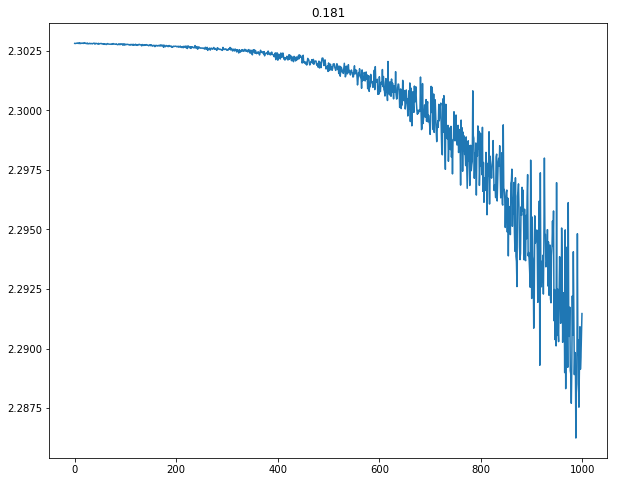

iteration 0 / 1000: loss 2.302823
iteration 100 / 1000: loss 2.302741
iteration 200 / 1000: loss 2.302655
iteration 300 / 1000: loss 2.302544
iteration 400 / 1000: loss 2.302314
iteration 500 / 1000: loss 2.302045
iteration 600 / 1000: loss 2.301417
iteration 700 / 1000: loss 2.301486
iteration 800 / 1000: loss 2.298031
iteration 900 / 1000: loss 2.296313


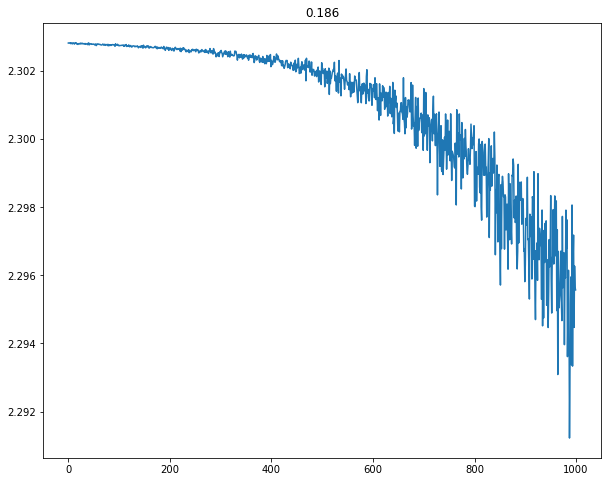

iteration 0 / 1000: loss 2.302995
iteration 100 / 1000: loss 2.302877
iteration 200 / 1000: loss 2.302791
iteration 300 / 1000: loss 2.302705
iteration 400 / 1000: loss 2.302161
iteration 500 / 1000: loss 2.301298
iteration 600 / 1000: loss 2.300844
iteration 700 / 1000: loss 2.300517
iteration 800 / 1000: loss 2.295680
iteration 900 / 1000: loss 2.285279


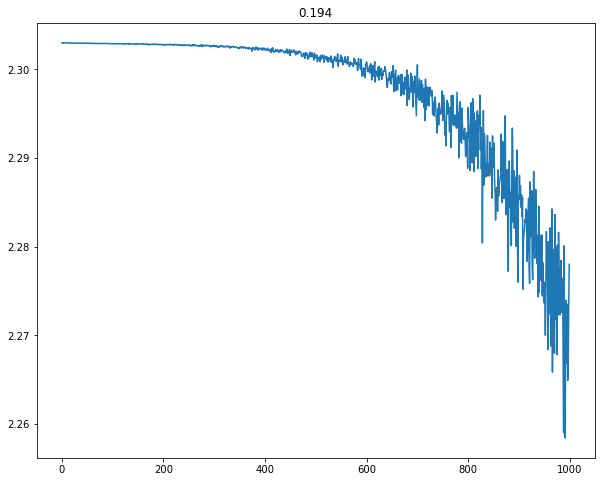

iteration 0 / 1000: loss 2.302973
iteration 100 / 1000: loss 2.302886
iteration 200 / 1000: loss 2.302830
iteration 300 / 1000: loss 2.302764
iteration 400 / 1000: loss 2.302422
iteration 500 / 1000: loss 2.302337
iteration 600 / 1000: loss 2.301003
iteration 700 / 1000: loss 2.300324
iteration 800 / 1000: loss 2.297636
iteration 900 / 1000: loss 2.294111


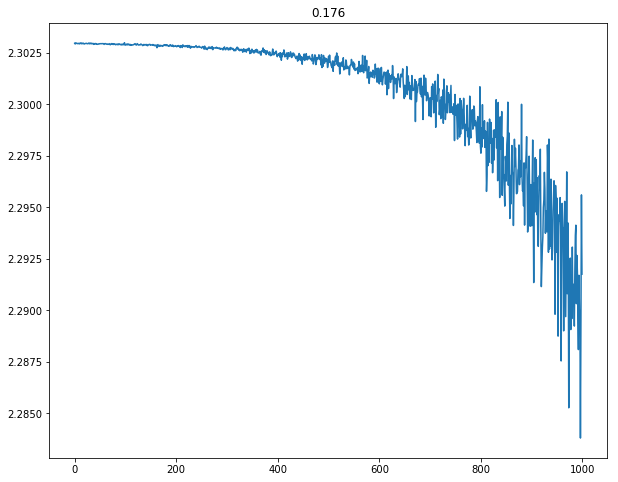

iteration 0 / 1000: loss 2.302997
iteration 100 / 1000: loss 2.302917
iteration 200 / 1000: loss 2.302797
iteration 300 / 1000: loss 2.302703
iteration 400 / 1000: loss 2.302522
iteration 500 / 1000: loss 2.302257
iteration 600 / 1000: loss 2.301517
iteration 700 / 1000: loss 2.301346
iteration 800 / 1000: loss 2.299659
iteration 900 / 1000: loss 2.298944


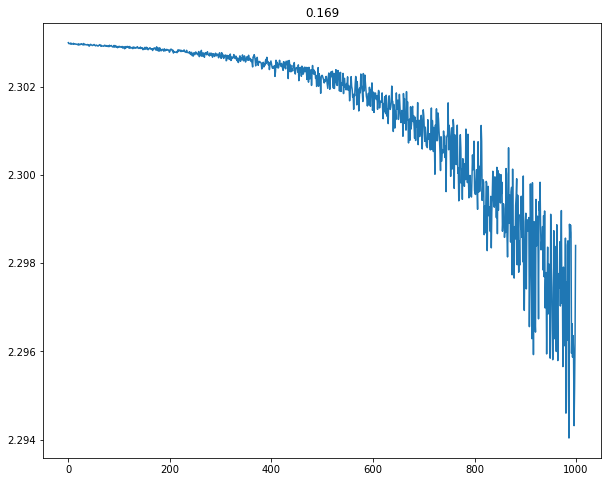

iteration 0 / 1000: loss 2.303105
iteration 100 / 1000: loss 2.303058
iteration 200 / 1000: loss 2.302971
iteration 300 / 1000: loss 2.302862
iteration 400 / 1000: loss 2.302738
iteration 500 / 1000: loss 2.302290
iteration 600 / 1000: loss 2.301440
iteration 700 / 1000: loss 2.299388
iteration 800 / 1000: loss 2.295844
iteration 900 / 1000: loss 2.289323


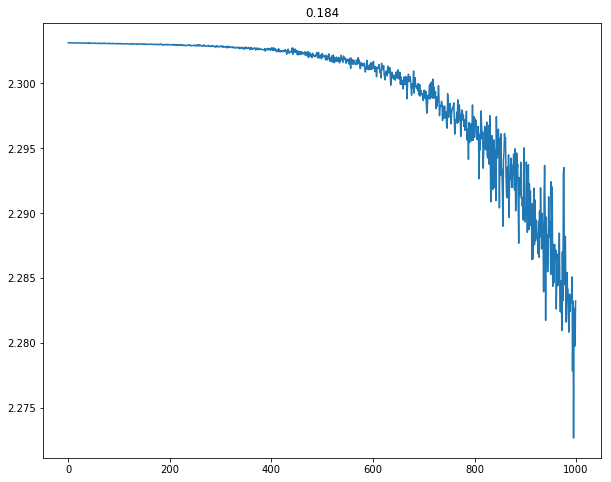

iteration 0 / 1000: loss 2.303141
iteration 100 / 1000: loss 2.303051
iteration 200 / 1000: loss 2.302931
iteration 300 / 1000: loss 2.302789
iteration 400 / 1000: loss 2.302611
iteration 500 / 1000: loss 2.302257
iteration 600 / 1000: loss 2.301318
iteration 700 / 1000: loss 2.299088
iteration 800 / 1000: loss 2.299027
iteration 900 / 1000: loss 2.295460


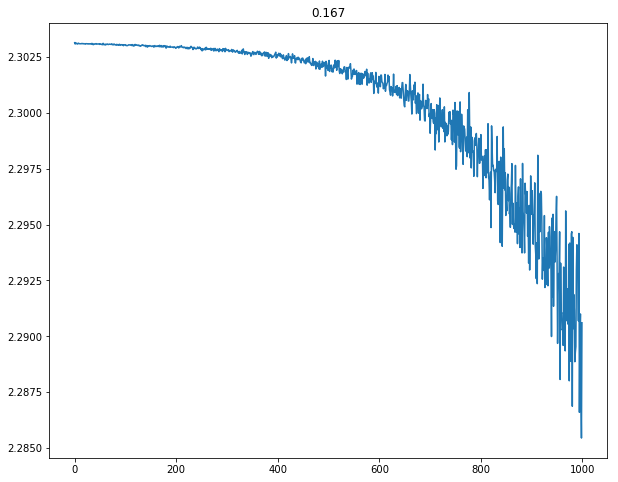

iteration 0 / 1000: loss 2.303143
iteration 100 / 1000: loss 2.303094
iteration 200 / 1000: loss 2.302952
iteration 300 / 1000: loss 2.302891
iteration 400 / 1000: loss 2.302765
iteration 500 / 1000: loss 2.302625
iteration 600 / 1000: loss 2.302074
iteration 700 / 1000: loss 2.301697
iteration 800 / 1000: loss 2.301014
iteration 900 / 1000: loss 2.299263


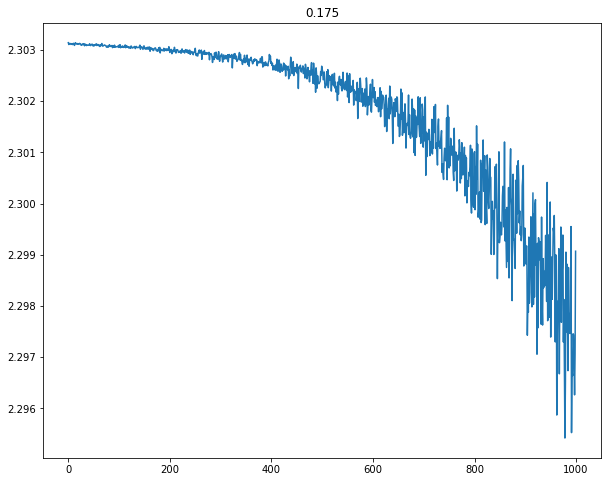

iteration 0 / 1000: loss 2.302878
iteration 100 / 1000: loss 2.302797
iteration 200 / 1000: loss 2.302686
iteration 300 / 1000: loss 2.302525
iteration 400 / 1000: loss 2.302089
iteration 500 / 1000: loss 2.301332
iteration 600 / 1000: loss 2.300125
iteration 700 / 1000: loss 2.298151
iteration 800 / 1000: loss 2.291638
iteration 900 / 1000: loss 2.285070


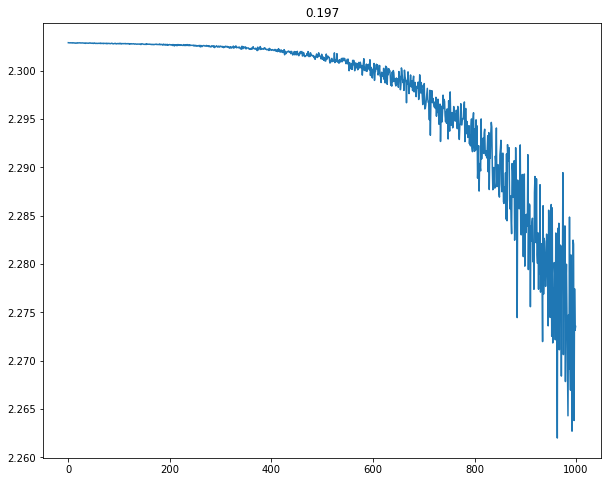

iteration 0 / 1000: loss 2.302854
iteration 100 / 1000: loss 2.302771
iteration 200 / 1000: loss 2.302691
iteration 300 / 1000: loss 2.302500
iteration 400 / 1000: loss 2.301918
iteration 500 / 1000: loss 2.301377
iteration 600 / 1000: loss 2.300382
iteration 700 / 1000: loss 2.299552
iteration 800 / 1000: loss 2.294029
iteration 900 / 1000: loss 2.291425


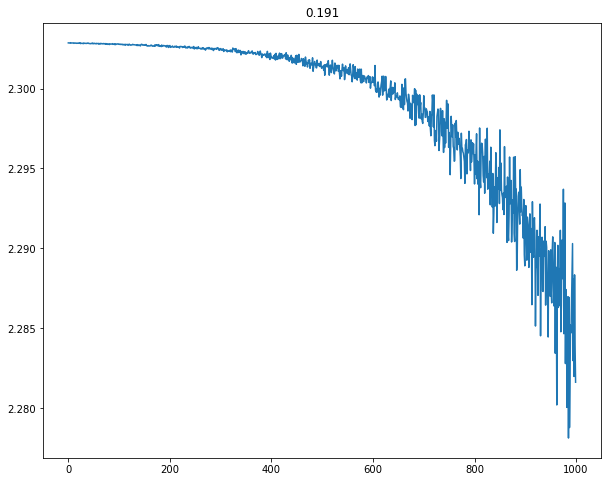

iteration 0 / 1000: loss 2.302859
iteration 100 / 1000: loss 2.302798
iteration 200 / 1000: loss 2.302652
iteration 300 / 1000: loss 2.302487
iteration 400 / 1000: loss 2.302363
iteration 500 / 1000: loss 2.301998
iteration 600 / 1000: loss 2.301186
iteration 700 / 1000: loss 2.300617
iteration 800 / 1000: loss 2.299406
iteration 900 / 1000: loss 2.297606


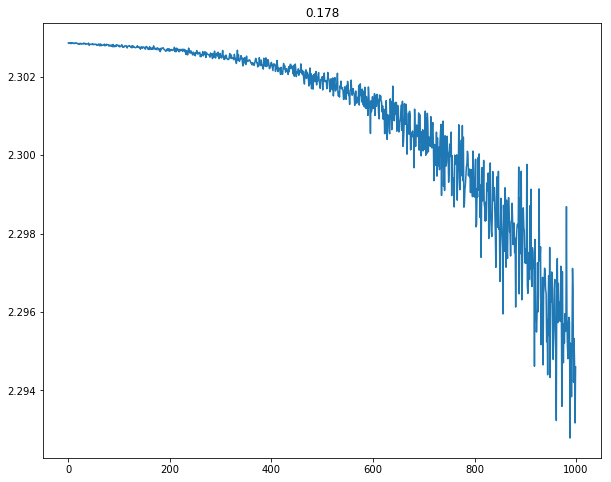

iteration 0 / 1000: loss 2.303035
iteration 100 / 1000: loss 2.302971
iteration 200 / 1000: loss 2.302893
iteration 300 / 1000: loss 2.302632
iteration 400 / 1000: loss 2.302392
iteration 500 / 1000: loss 2.301692
iteration 600 / 1000: loss 2.300694
iteration 700 / 1000: loss 2.297174
iteration 800 / 1000: loss 2.293002
iteration 900 / 1000: loss 2.293019


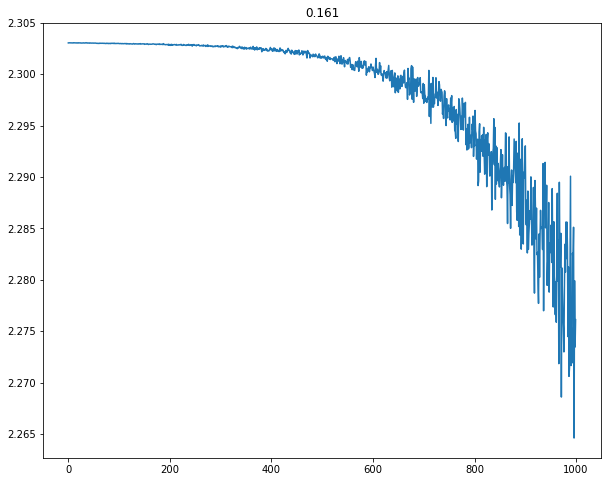

iteration 0 / 1000: loss 2.303058
iteration 100 / 1000: loss 2.302933
iteration 200 / 1000: loss 2.302846
iteration 300 / 1000: loss 2.302680
iteration 400 / 1000: loss 2.302513
iteration 500 / 1000: loss 2.301303
iteration 600 / 1000: loss 2.300684
iteration 700 / 1000: loss 2.297331
iteration 800 / 1000: loss 2.294790
iteration 900 / 1000: loss 2.290639


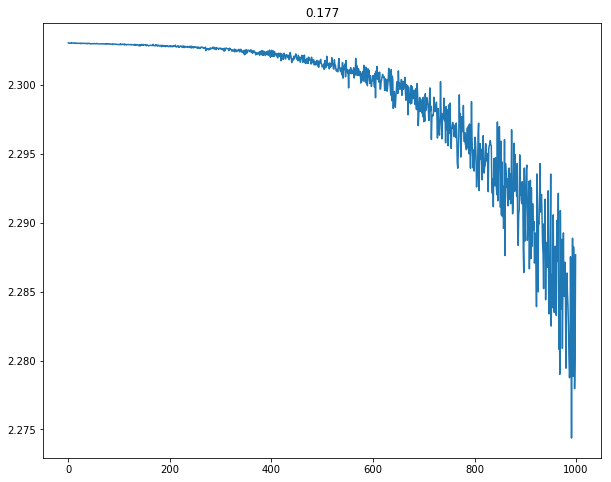

iteration 0 / 1000: loss 2.303042
iteration 100 / 1000: loss 2.302991
iteration 200 / 1000: loss 2.302857
iteration 300 / 1000: loss 2.302678
iteration 400 / 1000: loss 2.302499
iteration 500 / 1000: loss 2.302457
iteration 600 / 1000: loss 2.301520
iteration 700 / 1000: loss 2.300534
iteration 800 / 1000: loss 2.300048
iteration 900 / 1000: loss 2.299001


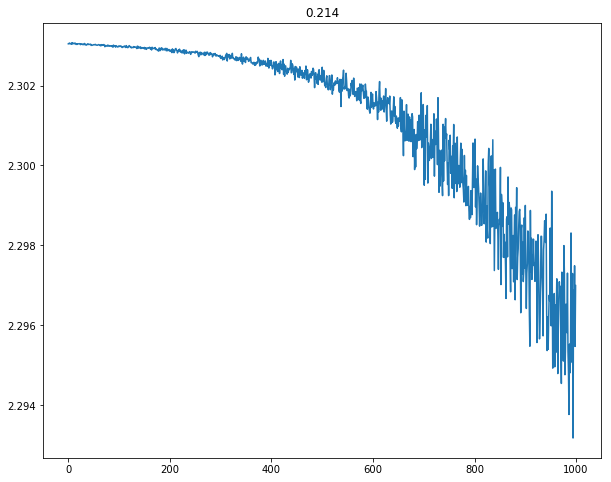

iteration 0 / 1000: loss 2.303212
iteration 100 / 1000: loss 2.303099
iteration 200 / 1000: loss 2.302953
iteration 300 / 1000: loss 2.302780
iteration 400 / 1000: loss 2.302274
iteration 500 / 1000: loss 2.301412
iteration 600 / 1000: loss 2.299666
iteration 700 / 1000: loss 2.293352
iteration 800 / 1000: loss 2.286833
iteration 900 / 1000: loss 2.278254


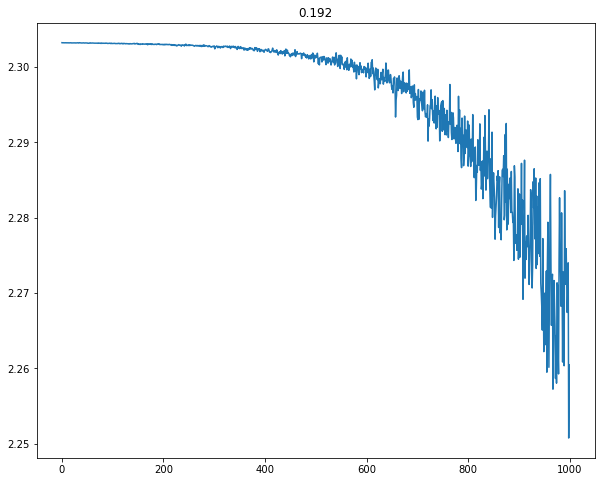

iteration 0 / 1000: loss 2.303242
iteration 100 / 1000: loss 2.303146
iteration 200 / 1000: loss 2.303102
iteration 300 / 1000: loss 2.302948
iteration 400 / 1000: loss 2.302834
iteration 500 / 1000: loss 2.302733
iteration 600 / 1000: loss 2.302079
iteration 700 / 1000: loss 2.301830
iteration 800 / 1000: loss 2.299134
iteration 900 / 1000: loss 2.299080


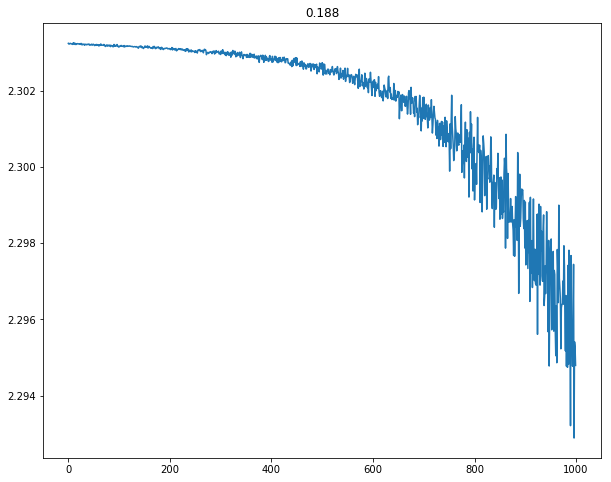

iteration 0 / 1000: loss 2.303236
iteration 100 / 1000: loss 2.303139
iteration 200 / 1000: loss 2.303046
iteration 300 / 1000: loss 2.302866
iteration 400 / 1000: loss 2.302566
iteration 500 / 1000: loss 2.302272
iteration 600 / 1000: loss 2.302118
iteration 700 / 1000: loss 2.300973
iteration 800 / 1000: loss 2.300894
iteration 900 / 1000: loss 2.297568


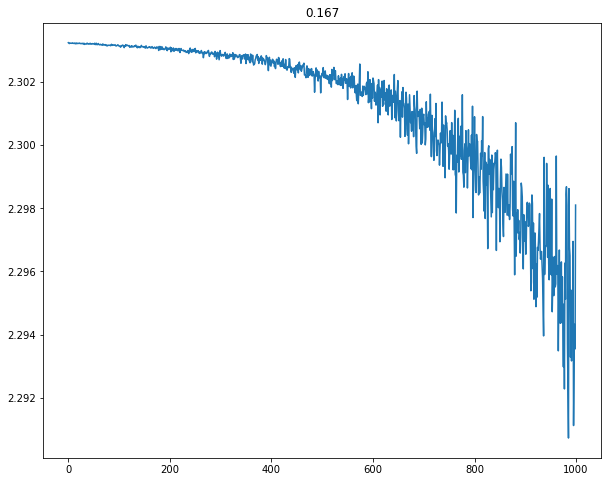

iteration 0 / 1000: loss 2.302746
iteration 100 / 1000: loss 2.302344
iteration 200 / 1000: loss 2.297944
iteration 300 / 1000: loss 2.267796
iteration 400 / 1000: loss 2.205643
iteration 500 / 1000: loss 2.121945
iteration 600 / 1000: loss 2.122975
iteration 700 / 1000: loss 2.027402
iteration 800 / 1000: loss 2.012315
iteration 900 / 1000: loss 1.983727


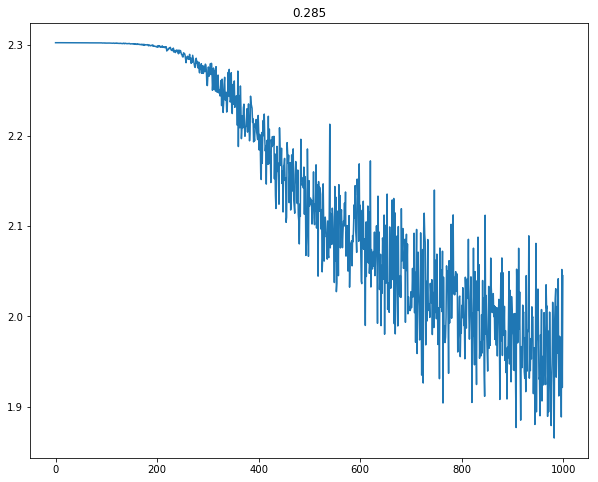

iteration 0 / 1000: loss 2.302778
iteration 100 / 1000: loss 2.302465
iteration 200 / 1000: loss 2.298936
iteration 300 / 1000: loss 2.283967
iteration 400 / 1000: loss 2.215846
iteration 500 / 1000: loss 2.244046
iteration 600 / 1000: loss 2.121937
iteration 700 / 1000: loss 2.133563
iteration 800 / 1000: loss 2.020004
iteration 900 / 1000: loss 2.026070


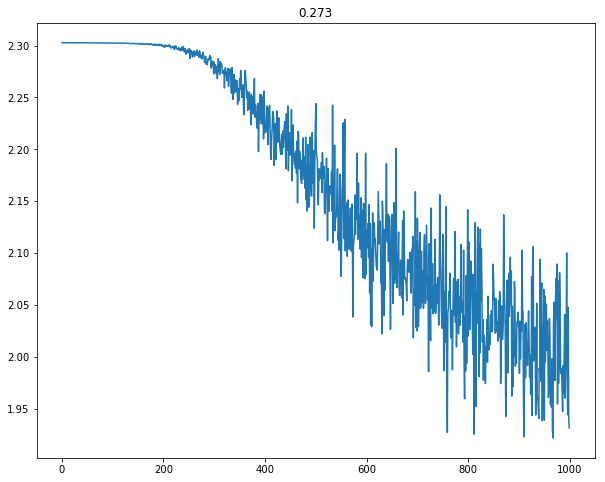

iteration 0 / 1000: loss 2.302751
iteration 100 / 1000: loss 2.302429
iteration 200 / 1000: loss 2.299922
iteration 300 / 1000: loss 2.286250
iteration 400 / 1000: loss 2.214428
iteration 500 / 1000: loss 2.174834
iteration 600 / 1000: loss 2.107564
iteration 700 / 1000: loss 2.145657
iteration 800 / 1000: loss 2.163659
iteration 900 / 1000: loss 2.033227


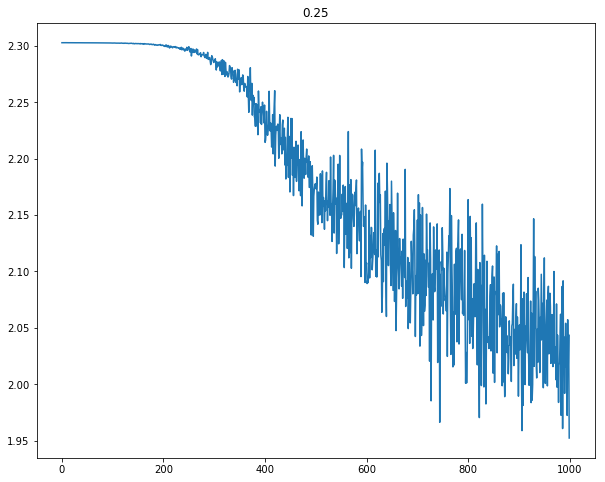

iteration 0 / 1000: loss 2.302873
iteration 100 / 1000: loss 2.302420
iteration 200 / 1000: loss 2.298451
iteration 300 / 1000: loss 2.272770
iteration 400 / 1000: loss 2.200878
iteration 500 / 1000: loss 2.118759
iteration 600 / 1000: loss 2.040310
iteration 700 / 1000: loss 2.021061
iteration 800 / 1000: loss 2.001185
iteration 900 / 1000: loss 2.008259


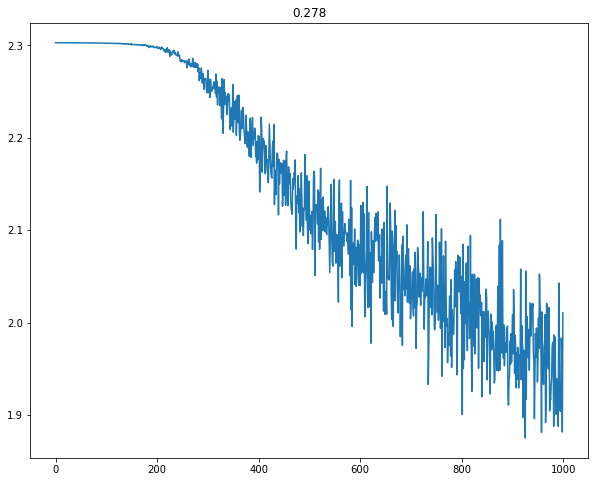

iteration 0 / 1000: loss 2.302865
iteration 100 / 1000: loss 2.302403
iteration 200 / 1000: loss 2.297419
iteration 300 / 1000: loss 2.266834
iteration 400 / 1000: loss 2.230052
iteration 500 / 1000: loss 2.152629
iteration 600 / 1000: loss 2.147606
iteration 700 / 1000: loss 2.020104
iteration 800 / 1000: loss 1.975339
iteration 900 / 1000: loss 1.992364


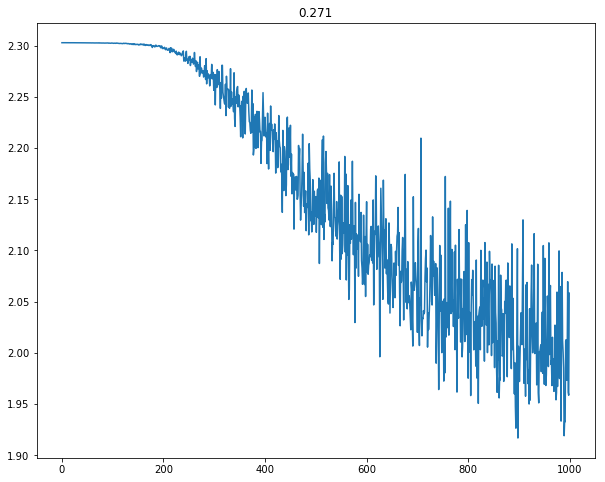

iteration 0 / 1000: loss 2.302879
iteration 100 / 1000: loss 2.302650
iteration 200 / 1000: loss 2.300493
iteration 300 / 1000: loss 2.288630
iteration 400 / 1000: loss 2.224811
iteration 500 / 1000: loss 2.178641
iteration 600 / 1000: loss 2.154041
iteration 700 / 1000: loss 2.011378
iteration 800 / 1000: loss 2.083405
iteration 900 / 1000: loss 2.099641


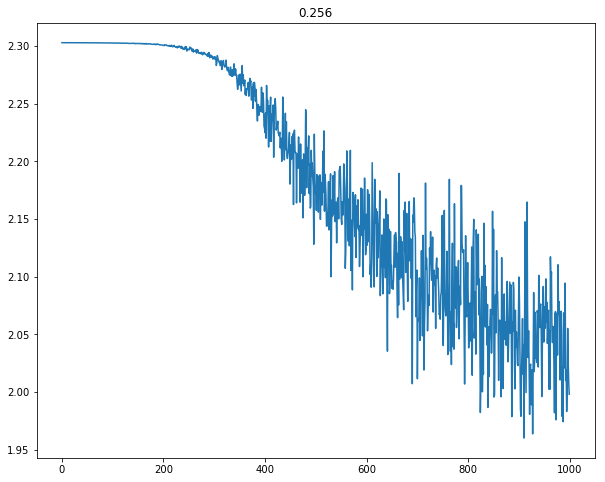

iteration 0 / 1000: loss 2.303019
iteration 100 / 1000: loss 2.302556
iteration 200 / 1000: loss 2.299535
iteration 300 / 1000: loss 2.278030
iteration 400 / 1000: loss 2.180133
iteration 500 / 1000: loss 2.117504
iteration 600 / 1000: loss 2.039779
iteration 700 / 1000: loss 2.105010
iteration 800 / 1000: loss 1.933032
iteration 900 / 1000: loss 2.027462


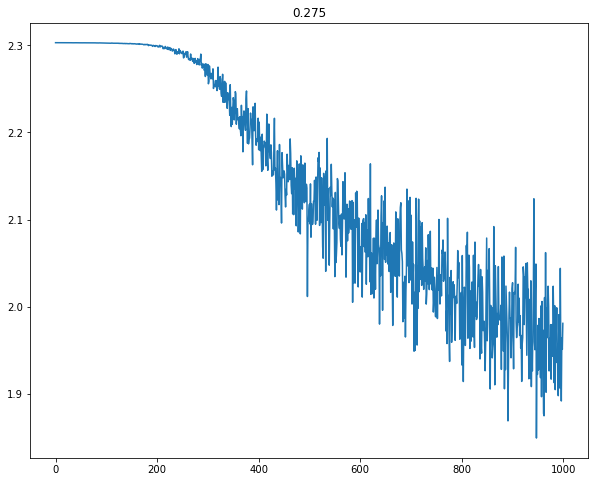

iteration 0 / 1000: loss 2.303024
iteration 100 / 1000: loss 2.302805
iteration 200 / 1000: loss 2.300066
iteration 300 / 1000: loss 2.287225
iteration 400 / 1000: loss 2.228091
iteration 500 / 1000: loss 2.183711
iteration 600 / 1000: loss 2.121331
iteration 700 / 1000: loss 2.061090
iteration 800 / 1000: loss 2.070202
iteration 900 / 1000: loss 1.996691


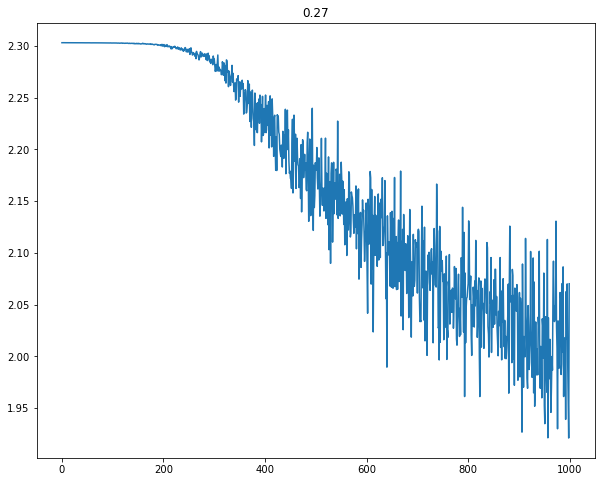

iteration 0 / 1000: loss 2.303043
iteration 100 / 1000: loss 2.302711
iteration 200 / 1000: loss 2.299691
iteration 300 / 1000: loss 2.273249
iteration 400 / 1000: loss 2.226385
iteration 500 / 1000: loss 2.163359
iteration 600 / 1000: loss 2.127533
iteration 700 / 1000: loss 2.087242
iteration 800 / 1000: loss 2.088468
iteration 900 / 1000: loss 2.071410


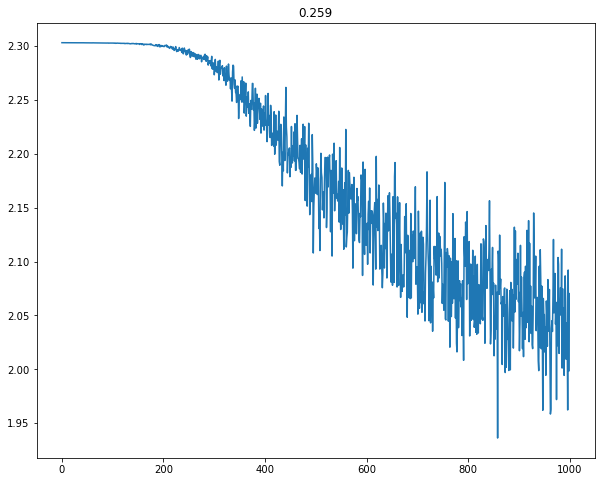

iteration 0 / 1000: loss 2.302807
iteration 100 / 1000: loss 2.302279
iteration 200 / 1000: loss 2.297030
iteration 300 / 1000: loss 2.247305
iteration 400 / 1000: loss 2.198488
iteration 500 / 1000: loss 2.135690
iteration 600 / 1000: loss 2.072994
iteration 700 / 1000: loss 2.099228
iteration 800 / 1000: loss 2.038344
iteration 900 / 1000: loss 2.002999


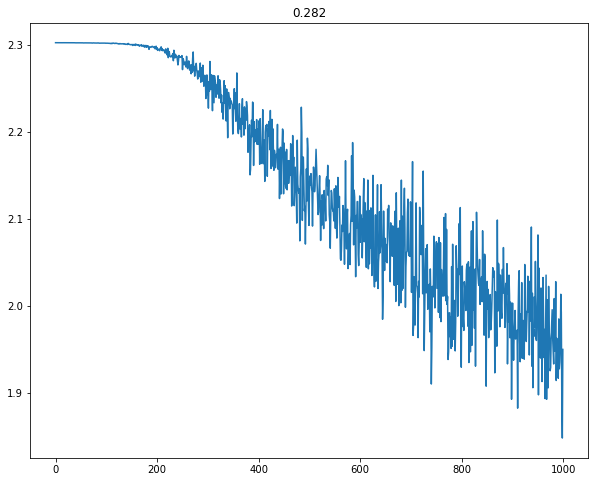

iteration 0 / 1000: loss 2.302811
iteration 100 / 1000: loss 2.302400
iteration 200 / 1000: loss 2.300121
iteration 300 / 1000: loss 2.279906
iteration 400 / 1000: loss 2.169288
iteration 500 / 1000: loss 2.164155
iteration 600 / 1000: loss 2.068103
iteration 700 / 1000: loss 2.090856
iteration 800 / 1000: loss 1.976893
iteration 900 / 1000: loss 1.988179


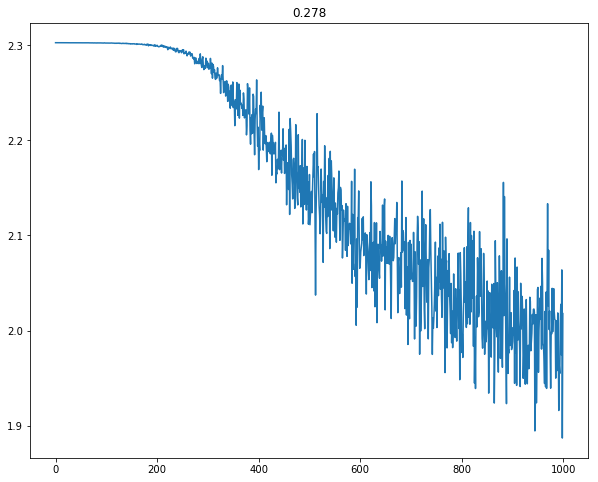

iteration 0 / 1000: loss 2.302808
iteration 100 / 1000: loss 2.302408
iteration 200 / 1000: loss 2.298576
iteration 300 / 1000: loss 2.277940
iteration 400 / 1000: loss 2.218245
iteration 500 / 1000: loss 2.157942
iteration 600 / 1000: loss 2.156918
iteration 700 / 1000: loss 2.085205
iteration 800 / 1000: loss 2.079583
iteration 900 / 1000: loss 2.055894


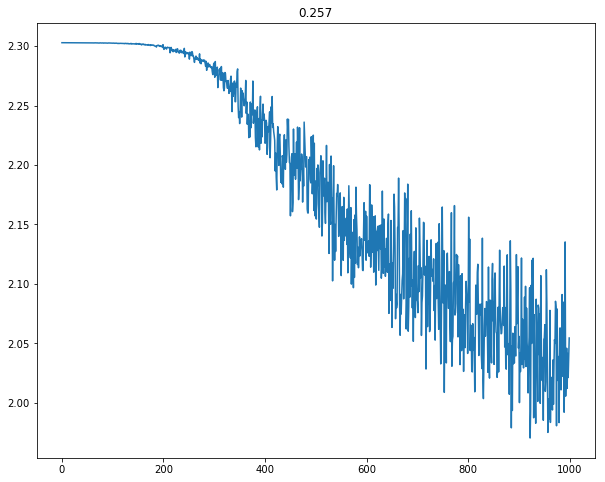

iteration 0 / 1000: loss 2.302967
iteration 100 / 1000: loss 2.302369
iteration 200 / 1000: loss 2.298976
iteration 300 / 1000: loss 2.251854
iteration 400 / 1000: loss 2.164329
iteration 500 / 1000: loss 2.097236
iteration 600 / 1000: loss 2.081480
iteration 700 / 1000: loss 2.052088
iteration 800 / 1000: loss 2.062625
iteration 900 / 1000: loss 1.950099


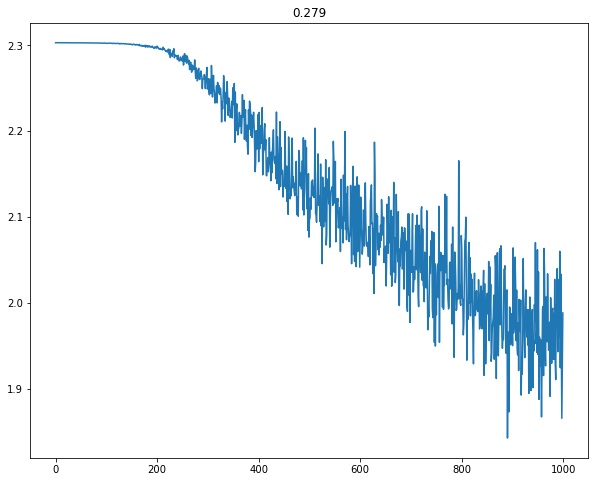

iteration 0 / 1000: loss 2.302957
iteration 100 / 1000: loss 2.302644
iteration 200 / 1000: loss 2.299758
iteration 300 / 1000: loss 2.272970
iteration 400 / 1000: loss 2.222498
iteration 500 / 1000: loss 2.114587
iteration 600 / 1000: loss 2.192299
iteration 700 / 1000: loss 2.002868
iteration 800 / 1000: loss 2.032604
iteration 900 / 1000: loss 2.029031


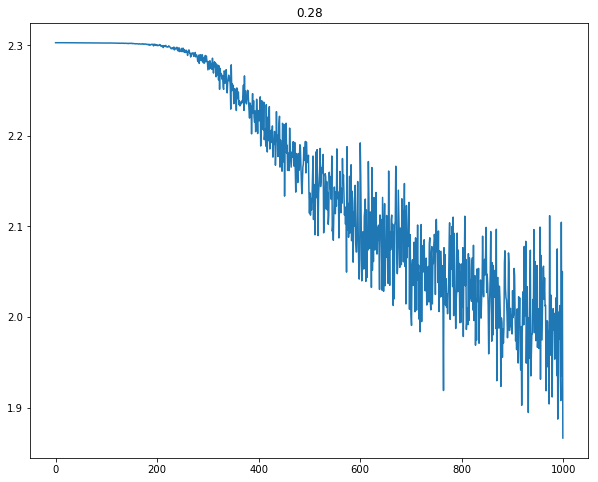

iteration 0 / 1000: loss 2.302968
iteration 100 / 1000: loss 2.302456
iteration 200 / 1000: loss 2.298146
iteration 300 / 1000: loss 2.268509
iteration 400 / 1000: loss 2.224426
iteration 500 / 1000: loss 2.163543
iteration 600 / 1000: loss 2.167337
iteration 700 / 1000: loss 2.110388
iteration 800 / 1000: loss 2.030161
iteration 900 / 1000: loss 2.038488


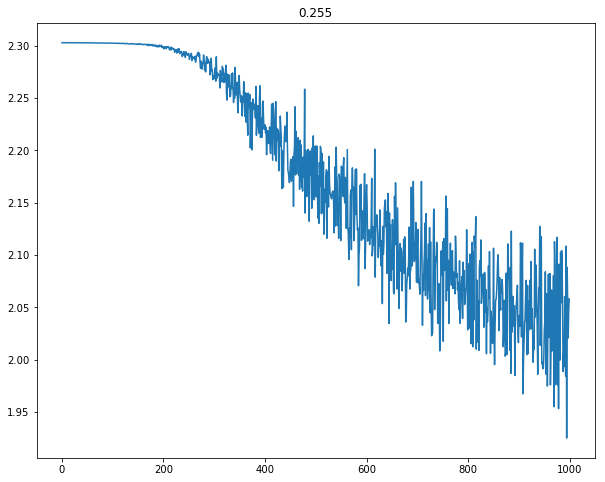

iteration 0 / 1000: loss 2.303106
iteration 100 / 1000: loss 2.302437
iteration 200 / 1000: loss 2.298123
iteration 300 / 1000: loss 2.251504
iteration 400 / 1000: loss 2.160122
iteration 500 / 1000: loss 2.128936
iteration 600 / 1000: loss 2.101729
iteration 700 / 1000: loss 2.002941
iteration 800 / 1000: loss 1.962504
iteration 900 / 1000: loss 1.941591


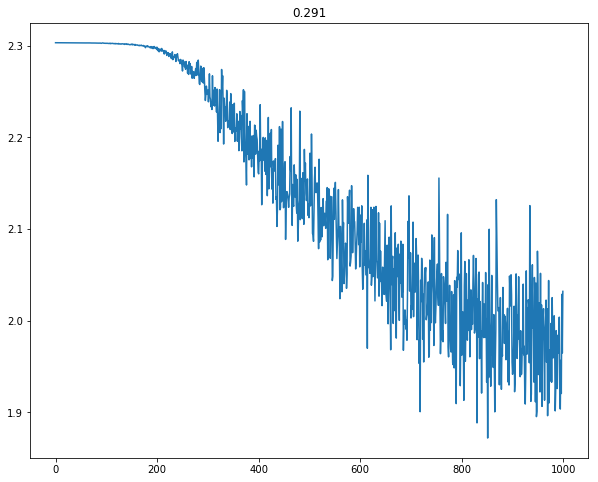

iteration 0 / 1000: loss 2.303117
iteration 100 / 1000: loss 2.302720
iteration 200 / 1000: loss 2.299657
iteration 300 / 1000: loss 2.284883
iteration 400 / 1000: loss 2.219117
iteration 500 / 1000: loss 2.163590
iteration 600 / 1000: loss 2.140863
iteration 700 / 1000: loss 2.032340
iteration 800 / 1000: loss 1.990971
iteration 900 / 1000: loss 1.998845


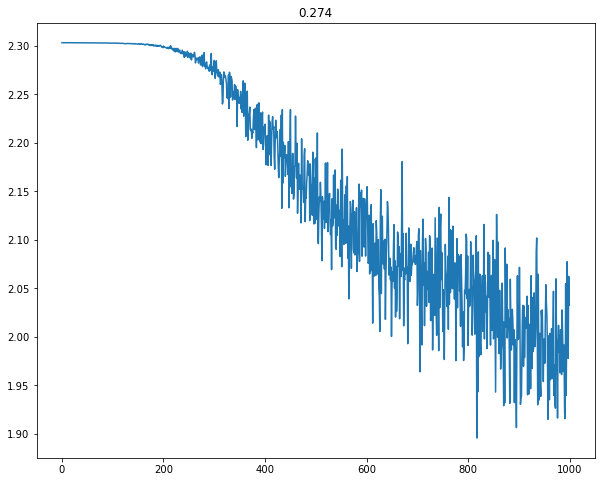

iteration 0 / 1000: loss 2.303150
iteration 100 / 1000: loss 2.302840
iteration 200 / 1000: loss 2.300602
iteration 300 / 1000: loss 2.290619
iteration 400 / 1000: loss 2.239314
iteration 500 / 1000: loss 2.147565
iteration 600 / 1000: loss 2.163251
iteration 700 / 1000: loss 2.071869
iteration 800 / 1000: loss 2.102221
iteration 900 / 1000: loss 1.985400


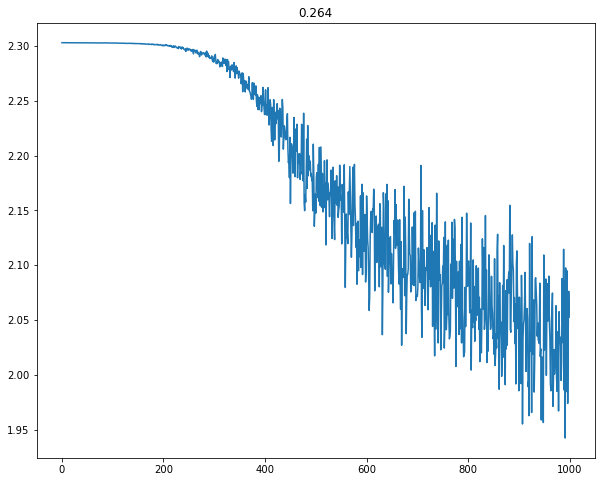

iteration 0 / 1000: loss 2.302847
iteration 100 / 1000: loss 2.302098
iteration 200 / 1000: loss 2.294772
iteration 300 / 1000: loss 2.255945
iteration 400 / 1000: loss 2.162878
iteration 500 / 1000: loss 2.101039
iteration 600 / 1000: loss 2.064141
iteration 700 / 1000: loss 2.017601
iteration 800 / 1000: loss 1.913630
iteration 900 / 1000: loss 1.954678


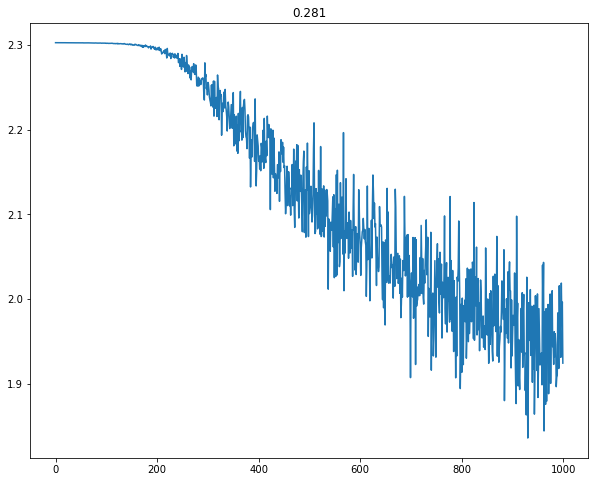

iteration 0 / 1000: loss 2.302879
iteration 100 / 1000: loss 2.302474
iteration 200 / 1000: loss 2.298491
iteration 300 / 1000: loss 2.273468
iteration 400 / 1000: loss 2.208790
iteration 500 / 1000: loss 2.171061
iteration 600 / 1000: loss 2.065870
iteration 700 / 1000: loss 2.061836
iteration 800 / 1000: loss 2.027461
iteration 900 / 1000: loss 1.978173


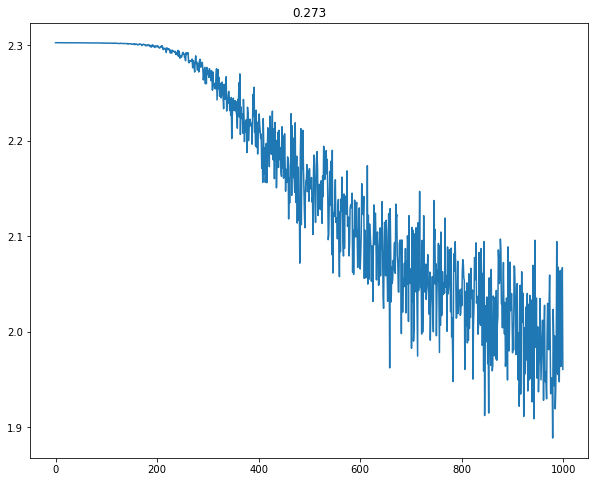

iteration 0 / 1000: loss 2.302838
iteration 100 / 1000: loss 2.302381
iteration 200 / 1000: loss 2.299129
iteration 300 / 1000: loss 2.279849
iteration 400 / 1000: loss 2.224830
iteration 500 / 1000: loss 2.180505
iteration 600 / 1000: loss 2.155594
iteration 700 / 1000: loss 2.060547
iteration 800 / 1000: loss 2.032994
iteration 900 / 1000: loss 2.054458


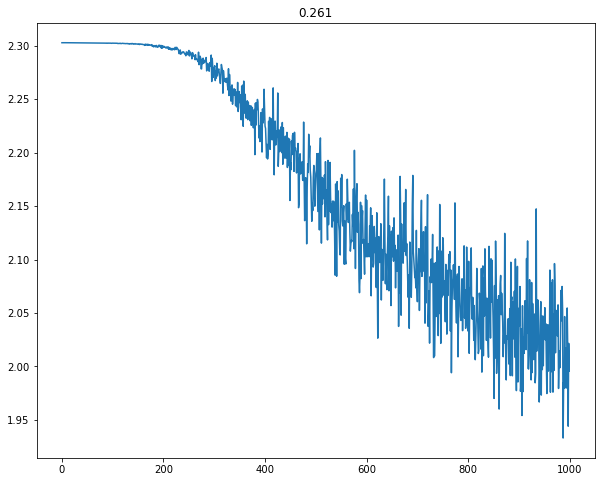

iteration 0 / 1000: loss 2.303054
iteration 100 / 1000: loss 2.302365
iteration 200 / 1000: loss 2.299649
iteration 300 / 1000: loss 2.262040
iteration 400 / 1000: loss 2.187301
iteration 500 / 1000: loss 2.147255
iteration 600 / 1000: loss 2.067266
iteration 700 / 1000: loss 2.044604
iteration 800 / 1000: loss 1.985246
iteration 900 / 1000: loss 1.976251


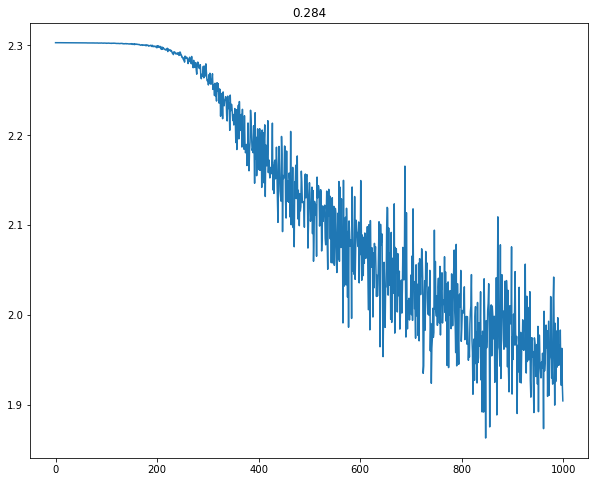

iteration 0 / 1000: loss 2.303043
iteration 100 / 1000: loss 2.302452
iteration 200 / 1000: loss 2.296318
iteration 300 / 1000: loss 2.260219
iteration 400 / 1000: loss 2.177279
iteration 500 / 1000: loss 2.140042
iteration 600 / 1000: loss 2.035475
iteration 700 / 1000: loss 2.099109
iteration 800 / 1000: loss 1.975197
iteration 900 / 1000: loss 2.014237


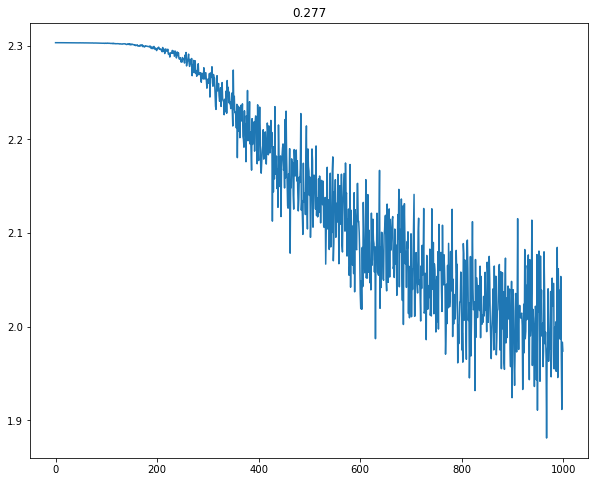

iteration 0 / 1000: loss 2.303012
iteration 100 / 1000: loss 2.302165
iteration 200 / 1000: loss 2.297831
iteration 300 / 1000: loss 2.274553
iteration 400 / 1000: loss 2.195110
iteration 500 / 1000: loss 2.125202
iteration 600 / 1000: loss 2.104487
iteration 700 / 1000: loss 2.084155
iteration 800 / 1000: loss 1.956494
iteration 900 / 1000: loss 2.013531


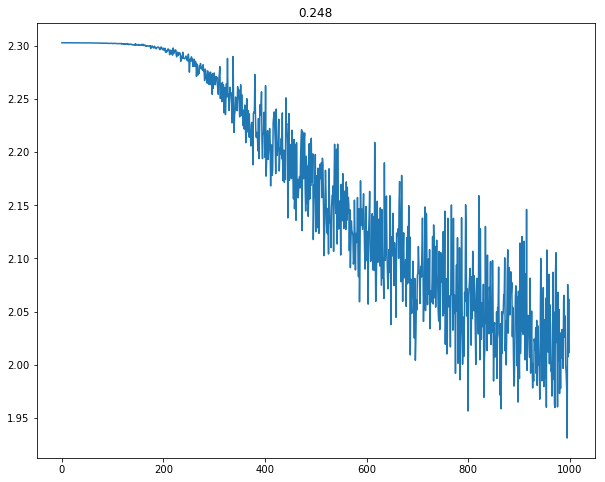

iteration 0 / 1000: loss 2.303237
iteration 100 / 1000: loss 2.302713
iteration 200 / 1000: loss 2.296279
iteration 300 / 1000: loss 2.246339
iteration 400 / 1000: loss 2.212979
iteration 500 / 1000: loss 2.114418
iteration 600 / 1000: loss 2.044453
iteration 700 / 1000: loss 1.975745
iteration 800 / 1000: loss 2.005262
iteration 900 / 1000: loss 1.977715


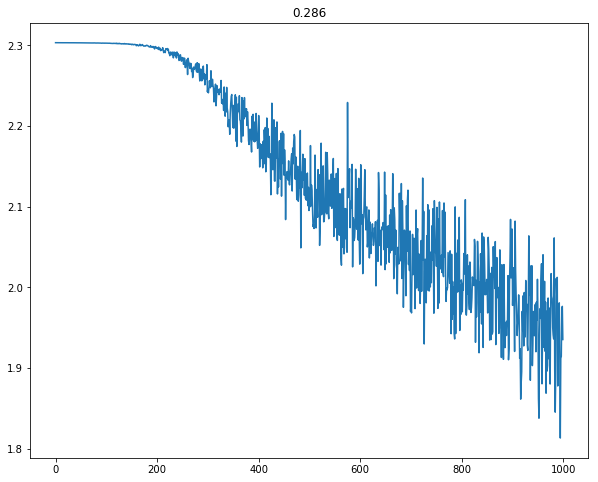

iteration 0 / 1000: loss 2.303195
iteration 100 / 1000: loss 2.302782
iteration 200 / 1000: loss 2.297990
iteration 300 / 1000: loss 2.261314
iteration 400 / 1000: loss 2.186119
iteration 500 / 1000: loss 2.171801
iteration 600 / 1000: loss 2.049931
iteration 700 / 1000: loss 2.023105
iteration 800 / 1000: loss 2.022490
iteration 900 / 1000: loss 1.950962


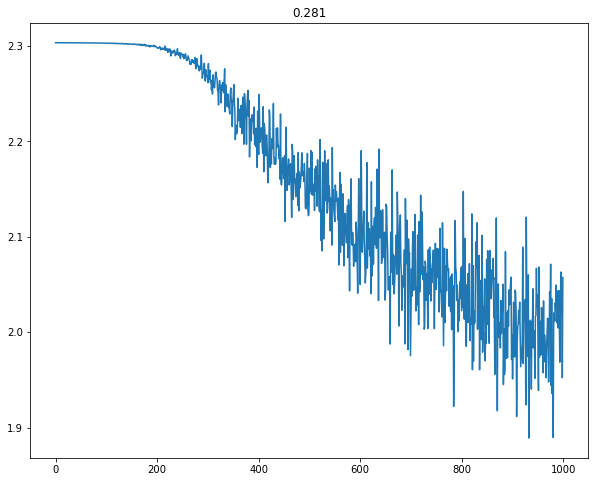

iteration 0 / 1000: loss 2.303203
iteration 100 / 1000: loss 2.302857
iteration 200 / 1000: loss 2.299454
iteration 300 / 1000: loss 2.288684
iteration 400 / 1000: loss 2.219215
iteration 500 / 1000: loss 2.175698
iteration 600 / 1000: loss 2.145686
iteration 700 / 1000: loss 2.069456
iteration 800 / 1000: loss 2.095613
iteration 900 / 1000: loss 1.999738


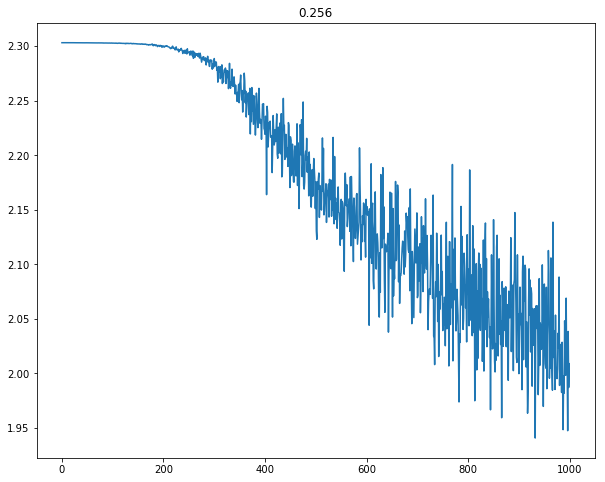

iteration 0 / 1000: loss 2.302763
iteration 100 / 1000: loss 2.273737
iteration 200 / 1000: loss 2.017106
iteration 300 / 1000: loss 1.983274
iteration 400 / 1000: loss 1.885642
iteration 500 / 1000: loss 1.839691
iteration 600 / 1000: loss 1.792100
iteration 700 / 1000: loss 1.835112
iteration 800 / 1000: loss 1.742795
iteration 900 / 1000: loss 1.837869


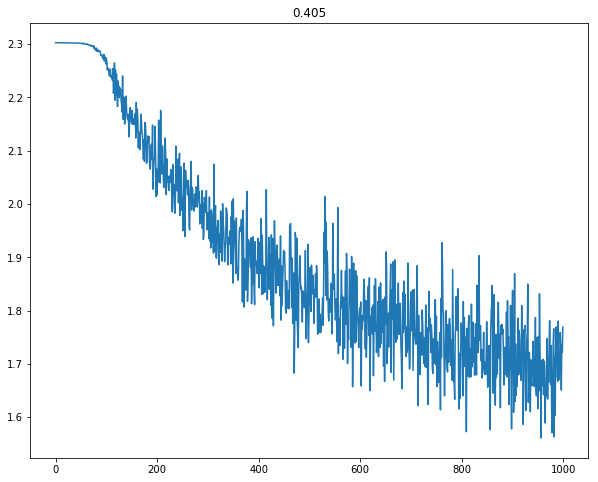

iteration 0 / 1000: loss 2.302776
iteration 100 / 1000: loss 2.283014
iteration 200 / 1000: loss 2.128565
iteration 300 / 1000: loss 1.969910
iteration 400 / 1000: loss 1.852812
iteration 500 / 1000: loss 1.853078
iteration 600 / 1000: loss 1.926747
iteration 700 / 1000: loss 1.667421
iteration 800 / 1000: loss 1.720102
iteration 900 / 1000: loss 1.785072


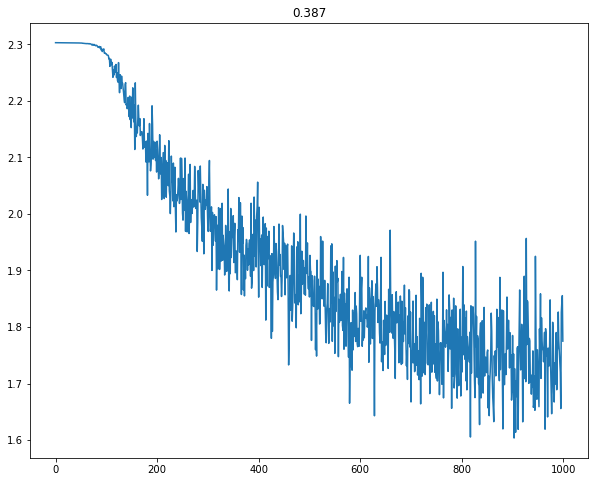

iteration 0 / 1000: loss 2.302745
iteration 100 / 1000: loss 2.277962
iteration 200 / 1000: loss 2.099306
iteration 300 / 1000: loss 2.124767
iteration 400 / 1000: loss 1.930450
iteration 500 / 1000: loss 1.877163
iteration 600 / 1000: loss 1.843583
iteration 700 / 1000: loss 1.807164
iteration 800 / 1000: loss 1.772462
iteration 900 / 1000: loss 1.760321


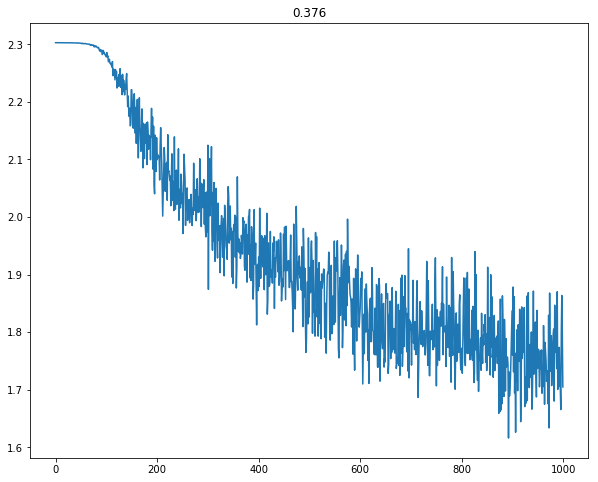

iteration 0 / 1000: loss 2.302906
iteration 100 / 1000: loss 2.268742
iteration 200 / 1000: loss 2.109953
iteration 300 / 1000: loss 1.922321
iteration 400 / 1000: loss 1.963547
iteration 500 / 1000: loss 1.829732
iteration 600 / 1000: loss 1.849449
iteration 700 / 1000: loss 1.763061
iteration 800 / 1000: loss 1.663533
iteration 900 / 1000: loss 1.705762


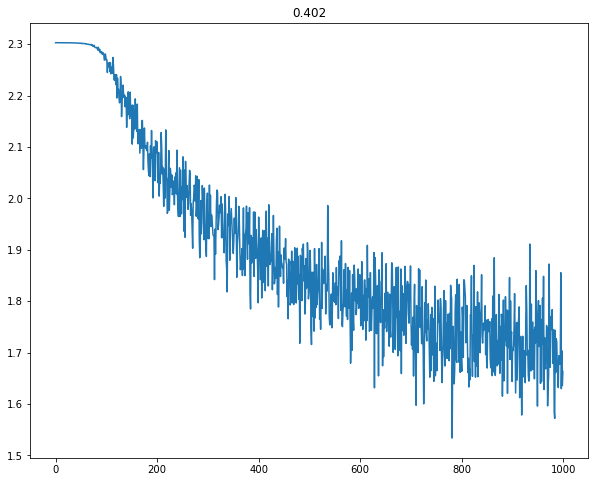

iteration 0 / 1000: loss 2.302889
iteration 100 / 1000: loss 2.278837
iteration 200 / 1000: loss 2.197079
iteration 300 / 1000: loss 1.963205
iteration 400 / 1000: loss 1.881775
iteration 500 / 1000: loss 1.907418
iteration 600 / 1000: loss 1.767524
iteration 700 / 1000: loss 1.847615
iteration 800 / 1000: loss 1.802032
iteration 900 / 1000: loss 1.730079


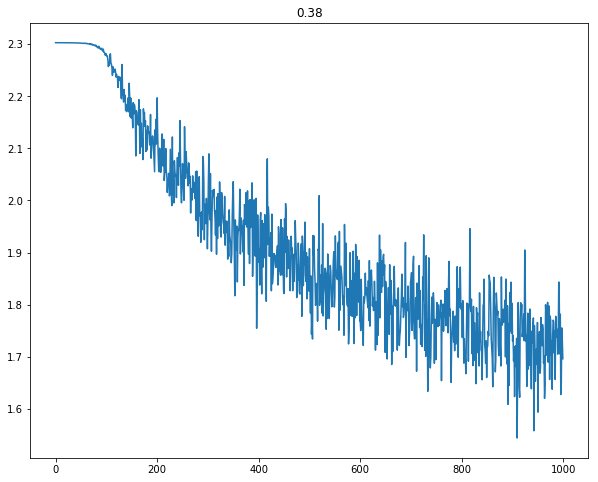

iteration 0 / 1000: loss 2.302877
iteration 100 / 1000: loss 2.279620
iteration 200 / 1000: loss 2.094281
iteration 300 / 1000: loss 2.047979
iteration 400 / 1000: loss 1.935318
iteration 500 / 1000: loss 1.932213
iteration 600 / 1000: loss 1.967068
iteration 700 / 1000: loss 1.739867
iteration 800 / 1000: loss 1.799198
iteration 900 / 1000: loss 1.788270


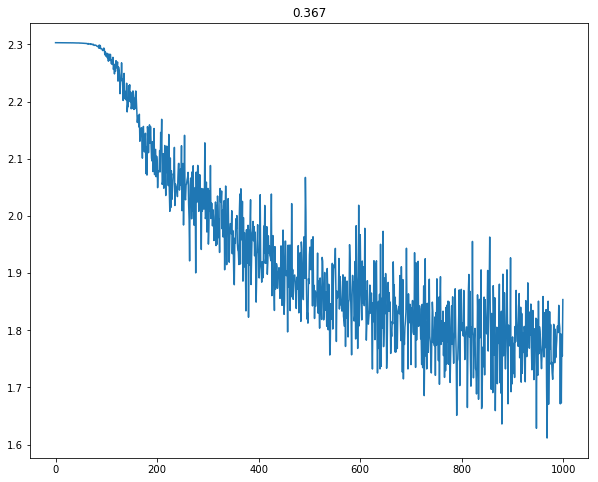

iteration 0 / 1000: loss 2.303030
iteration 100 / 1000: loss 2.254574
iteration 200 / 1000: loss 2.000381
iteration 300 / 1000: loss 2.001997
iteration 400 / 1000: loss 1.924848
iteration 500 / 1000: loss 1.856791
iteration 600 / 1000: loss 1.880341
iteration 700 / 1000: loss 1.841602
iteration 800 / 1000: loss 1.768314
iteration 900 / 1000: loss 1.694430


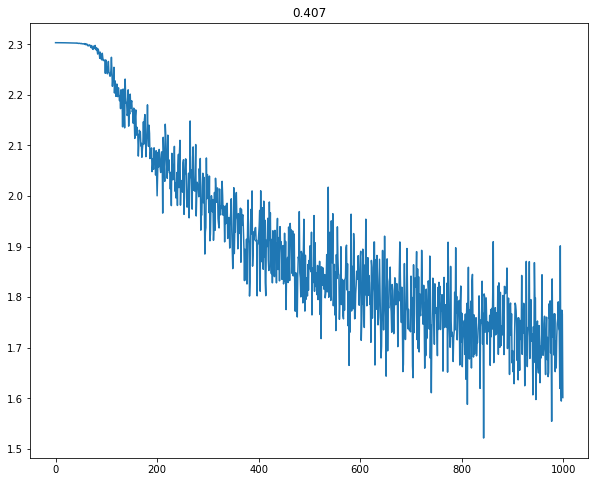

iteration 0 / 1000: loss 2.303045
iteration 100 / 1000: loss 2.282276
iteration 200 / 1000: loss 2.040555
iteration 300 / 1000: loss 2.025299
iteration 400 / 1000: loss 1.997189
iteration 500 / 1000: loss 1.798589
iteration 600 / 1000: loss 1.894057
iteration 700 / 1000: loss 1.786719
iteration 800 / 1000: loss 1.735507
iteration 900 / 1000: loss 1.742968


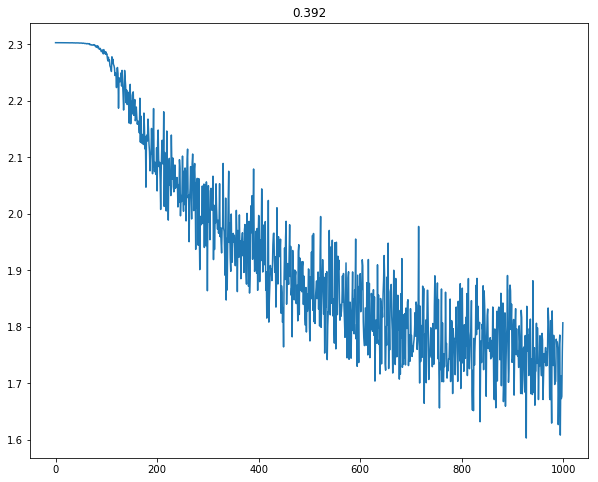

iteration 0 / 1000: loss 2.303019
iteration 100 / 1000: loss 2.290787
iteration 200 / 1000: loss 2.120076
iteration 300 / 1000: loss 2.032429
iteration 400 / 1000: loss 1.949007
iteration 500 / 1000: loss 1.811184
iteration 600 / 1000: loss 1.893962
iteration 700 / 1000: loss 1.870450
iteration 800 / 1000: loss 1.849946
iteration 900 / 1000: loss 1.819395


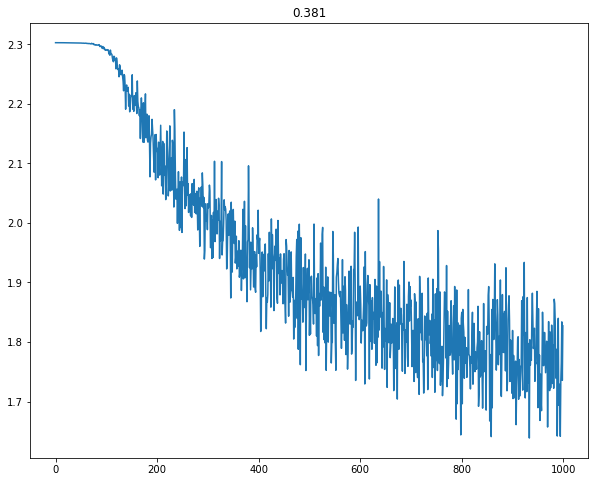

iteration 0 / 1000: loss 2.302827
iteration 100 / 1000: loss 2.254864
iteration 200 / 1000: loss 2.064920
iteration 300 / 1000: loss 1.917598
iteration 400 / 1000: loss 1.875004
iteration 500 / 1000: loss 1.844738
iteration 600 / 1000: loss 1.739297
iteration 700 / 1000: loss 1.801755
iteration 800 / 1000: loss 1.696603
iteration 900 / 1000: loss 1.688119


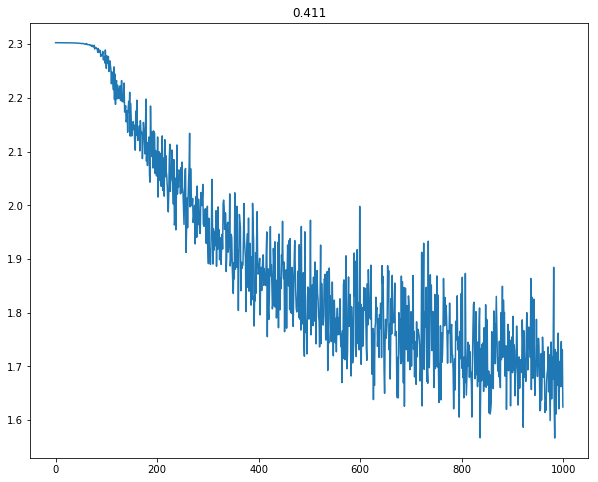

iteration 0 / 1000: loss 2.302778
iteration 100 / 1000: loss 2.283704
iteration 200 / 1000: loss 2.104734
iteration 300 / 1000: loss 1.967658
iteration 400 / 1000: loss 1.902900
iteration 500 / 1000: loss 1.929579
iteration 600 / 1000: loss 1.773182
iteration 700 / 1000: loss 1.785901
iteration 800 / 1000: loss 1.763867
iteration 900 / 1000: loss 1.778195


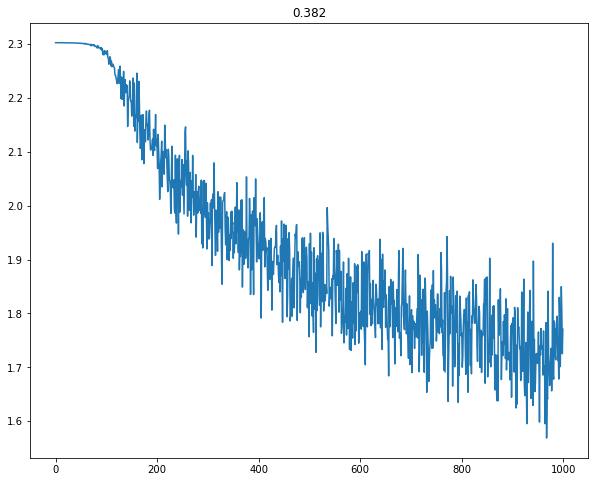

iteration 0 / 1000: loss 2.302804
iteration 100 / 1000: loss 2.284999
iteration 200 / 1000: loss 2.117322
iteration 300 / 1000: loss 2.044074
iteration 400 / 1000: loss 2.035464
iteration 500 / 1000: loss 1.813328
iteration 600 / 1000: loss 1.864645
iteration 700 / 1000: loss 1.876732
iteration 800 / 1000: loss 1.725026
iteration 900 / 1000: loss 1.803237


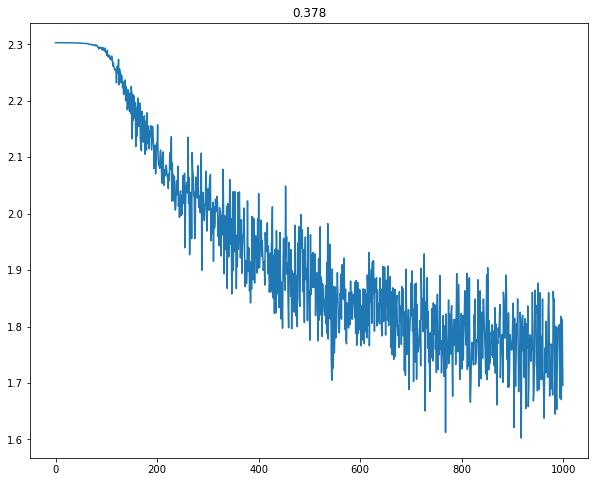

iteration 0 / 1000: loss 2.302960
iteration 100 / 1000: loss 2.240557
iteration 200 / 1000: loss 2.067488
iteration 300 / 1000: loss 2.034780
iteration 400 / 1000: loss 1.908822
iteration 500 / 1000: loss 1.926823
iteration 600 / 1000: loss 1.913063
iteration 700 / 1000: loss 1.804232
iteration 800 / 1000: loss 1.766967
iteration 900 / 1000: loss 1.711383


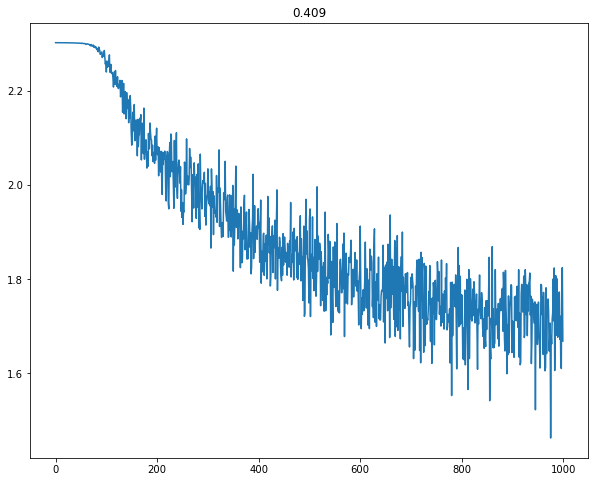

iteration 0 / 1000: loss 2.303001
iteration 100 / 1000: loss 2.263119
iteration 200 / 1000: loss 2.110576
iteration 300 / 1000: loss 1.976807
iteration 400 / 1000: loss 1.990587
iteration 500 / 1000: loss 1.826887
iteration 600 / 1000: loss 1.808461
iteration 700 / 1000: loss 1.838066
iteration 800 / 1000: loss 1.755778
iteration 900 / 1000: loss 1.699981


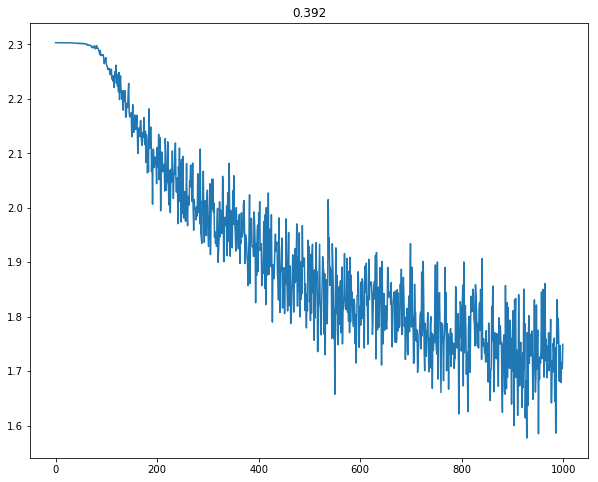

iteration 0 / 1000: loss 2.302968
iteration 100 / 1000: loss 2.278902
iteration 200 / 1000: loss 2.066189
iteration 300 / 1000: loss 1.987332
iteration 400 / 1000: loss 1.885244
iteration 500 / 1000: loss 1.930309
iteration 600 / 1000: loss 1.844122
iteration 700 / 1000: loss 1.762064
iteration 800 / 1000: loss 1.728992
iteration 900 / 1000: loss 1.699183


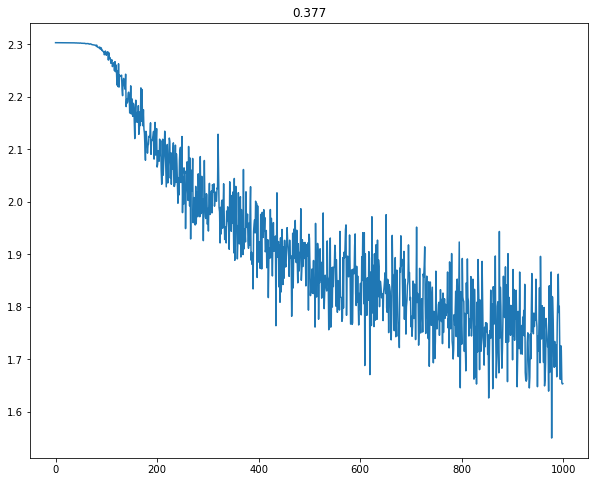

iteration 0 / 1000: loss 2.303126
iteration 100 / 1000: loss 2.247545
iteration 200 / 1000: loss 2.027402
iteration 300 / 1000: loss 2.000037
iteration 400 / 1000: loss 1.887299
iteration 500 / 1000: loss 1.866995
iteration 600 / 1000: loss 1.954994
iteration 700 / 1000: loss 1.820261
iteration 800 / 1000: loss 1.685790
iteration 900 / 1000: loss 1.619819


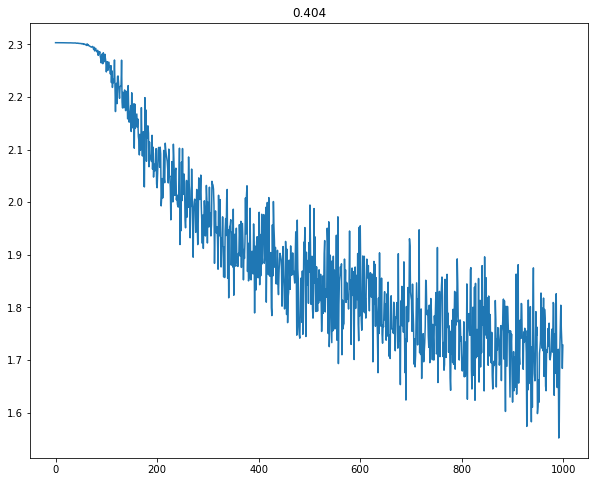

iteration 0 / 1000: loss 2.303144
iteration 100 / 1000: loss 2.274437
iteration 200 / 1000: loss 2.078005
iteration 300 / 1000: loss 2.022367
iteration 400 / 1000: loss 1.808588
iteration 500 / 1000: loss 1.811695
iteration 600 / 1000: loss 1.901416
iteration 700 / 1000: loss 1.757636
iteration 800 / 1000: loss 1.717427
iteration 900 / 1000: loss 1.678560


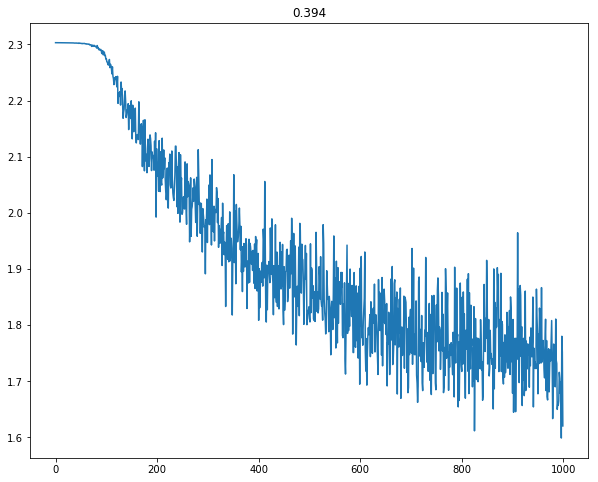

iteration 0 / 1000: loss 2.303141
iteration 100 / 1000: loss 2.283205
iteration 200 / 1000: loss 2.105955
iteration 300 / 1000: loss 2.006214
iteration 400 / 1000: loss 1.991154
iteration 500 / 1000: loss 1.879252
iteration 600 / 1000: loss 1.938883
iteration 700 / 1000: loss 1.908552
iteration 800 / 1000: loss 1.739041
iteration 900 / 1000: loss 1.693181


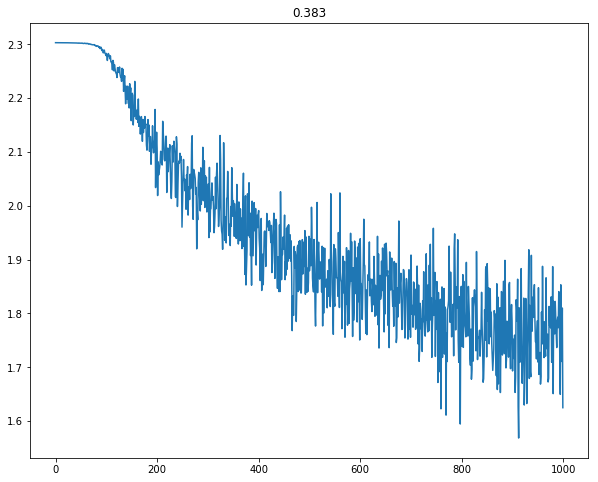

iteration 0 / 1000: loss 2.302868
iteration 100 / 1000: loss 2.274374
iteration 200 / 1000: loss 2.097864
iteration 300 / 1000: loss 2.021455
iteration 400 / 1000: loss 1.867531
iteration 500 / 1000: loss 1.859581
iteration 600 / 1000: loss 1.736296
iteration 700 / 1000: loss 1.682016
iteration 800 / 1000: loss 1.746904
iteration 900 / 1000: loss 1.736872


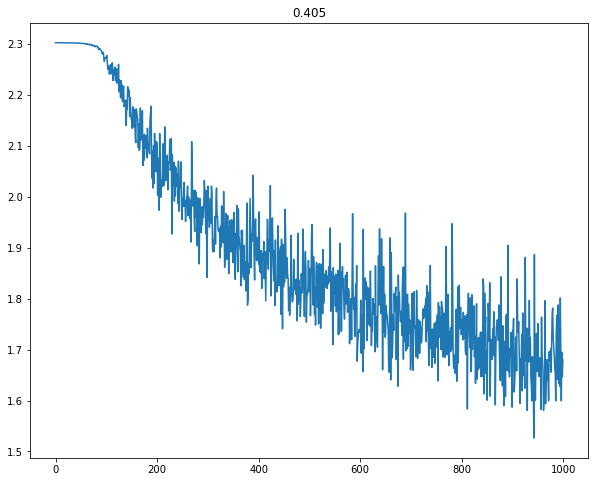

iteration 0 / 1000: loss 2.302867
iteration 100 / 1000: loss 2.268897
iteration 200 / 1000: loss 2.110081
iteration 300 / 1000: loss 1.995054
iteration 400 / 1000: loss 1.785240
iteration 500 / 1000: loss 1.871062
iteration 600 / 1000: loss 1.813896
iteration 700 / 1000: loss 1.795641
iteration 800 / 1000: loss 1.642105
iteration 900 / 1000: loss 1.798157


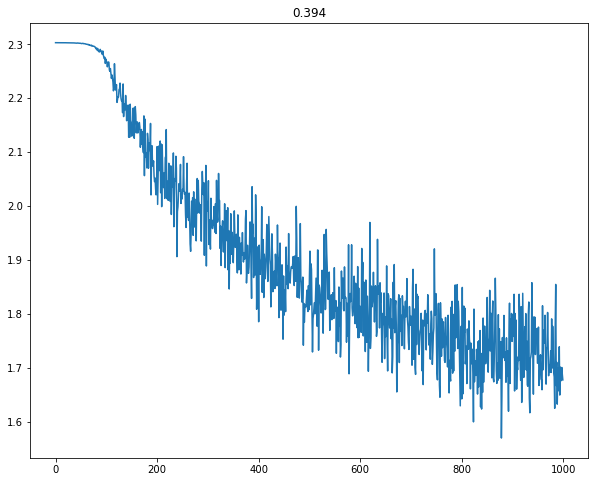

iteration 0 / 1000: loss 2.302866
iteration 100 / 1000: loss 2.280578
iteration 200 / 1000: loss 2.092185
iteration 300 / 1000: loss 2.026666
iteration 400 / 1000: loss 1.959426
iteration 500 / 1000: loss 1.941690
iteration 600 / 1000: loss 1.865351
iteration 700 / 1000: loss 1.758945
iteration 800 / 1000: loss 1.758881
iteration 900 / 1000: loss 1.732742


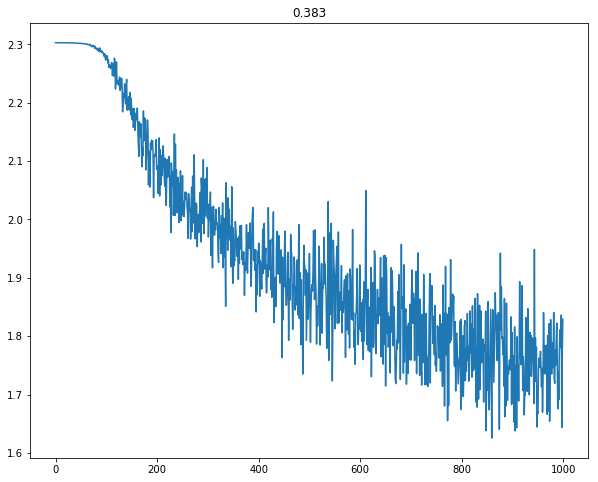

iteration 0 / 1000: loss 2.303037
iteration 100 / 1000: loss 2.248476
iteration 200 / 1000: loss 2.070562
iteration 300 / 1000: loss 1.983420
iteration 400 / 1000: loss 1.990988
iteration 500 / 1000: loss 1.794324
iteration 600 / 1000: loss 1.750904
iteration 700 / 1000: loss 1.866532
iteration 800 / 1000: loss 1.781011
iteration 900 / 1000: loss 1.614920


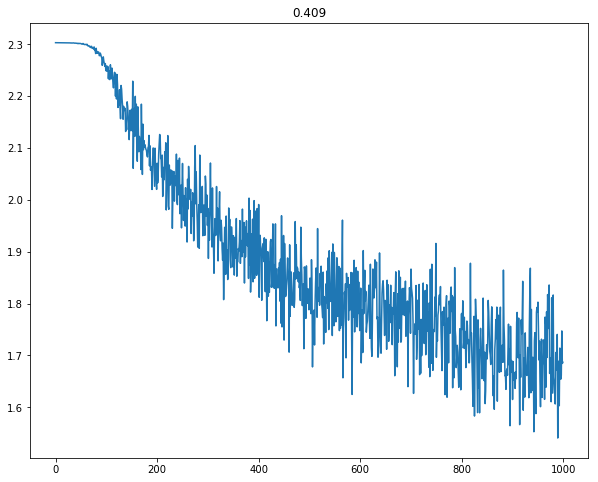

iteration 0 / 1000: loss 2.303027
iteration 100 / 1000: loss 2.263718
iteration 200 / 1000: loss 2.069534
iteration 300 / 1000: loss 1.932423
iteration 400 / 1000: loss 1.959954
iteration 500 / 1000: loss 1.831998
iteration 600 / 1000: loss 1.712539
iteration 700 / 1000: loss 1.836365
iteration 800 / 1000: loss 1.814698
iteration 900 / 1000: loss 1.755013


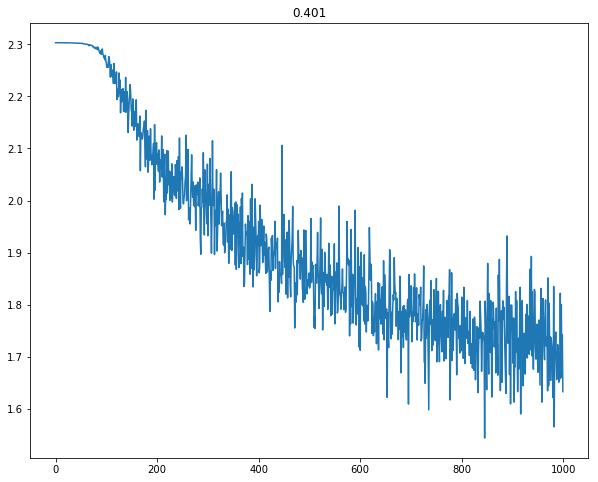

iteration 0 / 1000: loss 2.303040
iteration 100 / 1000: loss 2.278057
iteration 200 / 1000: loss 2.092439
iteration 300 / 1000: loss 1.998900
iteration 400 / 1000: loss 1.933249
iteration 500 / 1000: loss 1.902162
iteration 600 / 1000: loss 1.822925
iteration 700 / 1000: loss 1.779938
iteration 800 / 1000: loss 1.850261
iteration 900 / 1000: loss 1.788835


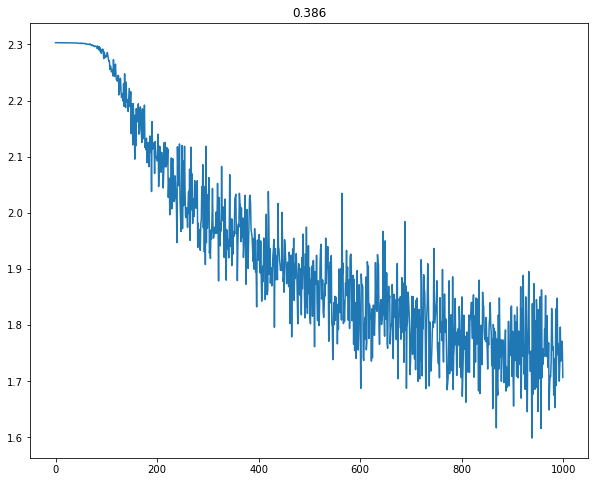

iteration 0 / 1000: loss 2.303246
iteration 100 / 1000: loss 2.259878
iteration 200 / 1000: loss 2.083714
iteration 300 / 1000: loss 1.889013
iteration 400 / 1000: loss 1.901465
iteration 500 / 1000: loss 1.818619
iteration 600 / 1000: loss 1.792445
iteration 700 / 1000: loss 1.880688
iteration 800 / 1000: loss 1.843630
iteration 900 / 1000: loss 1.790952


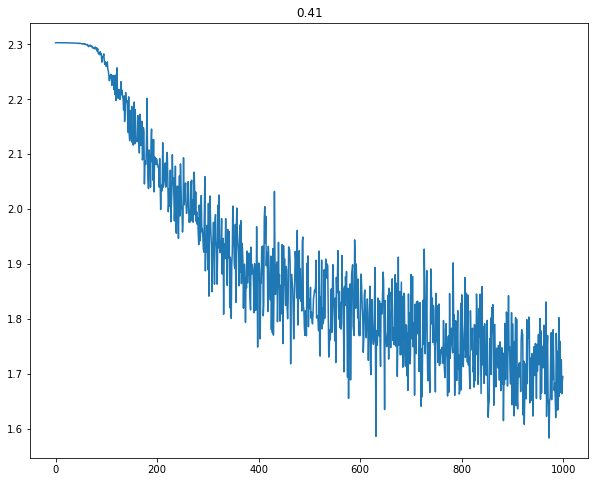

iteration 0 / 1000: loss 2.303226
iteration 100 / 1000: loss 2.277074
iteration 200 / 1000: loss 2.081733
iteration 300 / 1000: loss 1.989916
iteration 400 / 1000: loss 1.867589
iteration 500 / 1000: loss 1.929537
iteration 600 / 1000: loss 1.804928
iteration 700 / 1000: loss 1.693798
iteration 800 / 1000: loss 1.824353
iteration 900 / 1000: loss 1.759983


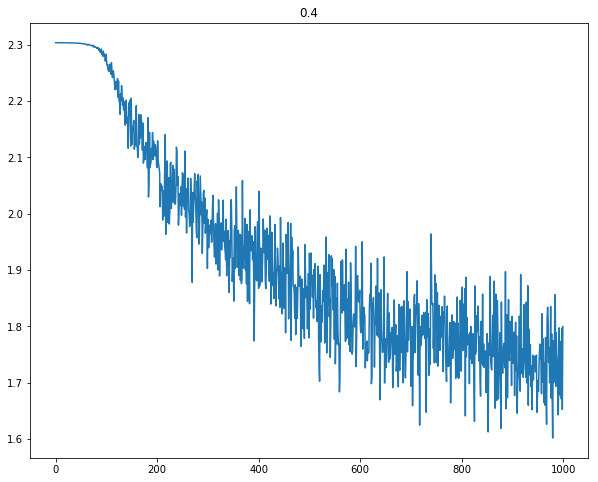

iteration 0 / 1000: loss 2.303226
iteration 100 / 1000: loss 2.279216
iteration 200 / 1000: loss 2.185969
iteration 300 / 1000: loss 1.995873
iteration 400 / 1000: loss 1.951118
iteration 500 / 1000: loss 1.959009
iteration 600 / 1000: loss 1.865068
iteration 700 / 1000: loss 1.833924
iteration 800 / 1000: loss 1.853496
iteration 900 / 1000: loss 1.792992


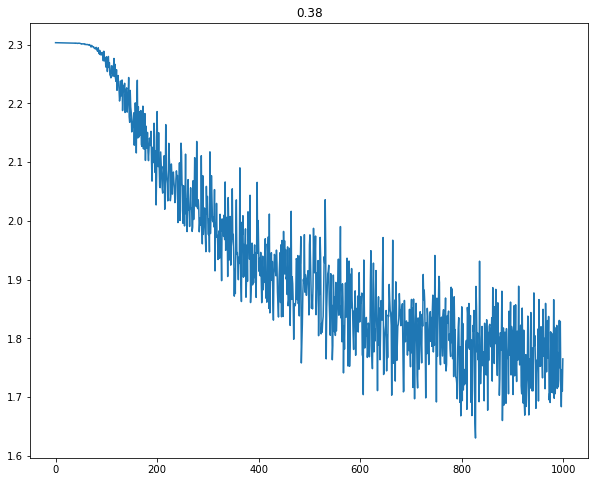

iteration 0 / 1000: loss 2.302796
iteration 100 / 1000: loss 1.943380
iteration 200 / 1000: loss 1.865929
iteration 300 / 1000: loss 1.582333
iteration 400 / 1000: loss 1.744689
iteration 500 / 1000: loss 1.503532
iteration 600 / 1000: loss 1.530863
iteration 700 / 1000: loss 1.584244
iteration 800 / 1000: loss 1.593728
iteration 900 / 1000: loss 1.485742


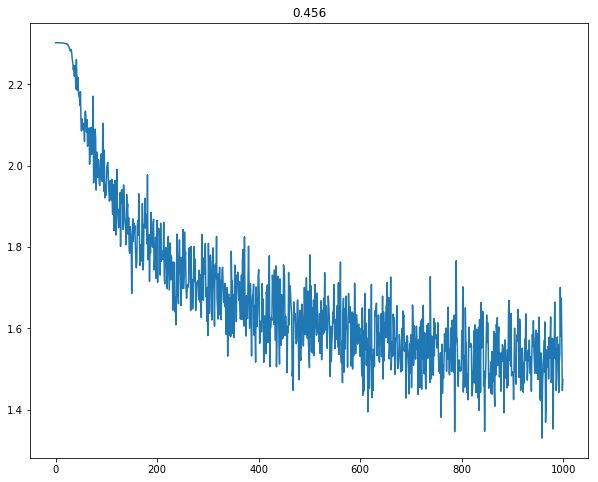

iteration 0 / 1000: loss 2.302773
iteration 100 / 1000: loss 1.981767
iteration 200 / 1000: loss 1.755717
iteration 300 / 1000: loss 1.789692
iteration 400 / 1000: loss 1.488139
iteration 500 / 1000: loss 1.528312
iteration 600 / 1000: loss 1.659129
iteration 700 / 1000: loss 1.618439
iteration 800 / 1000: loss 1.497575
iteration 900 / 1000: loss 1.569631


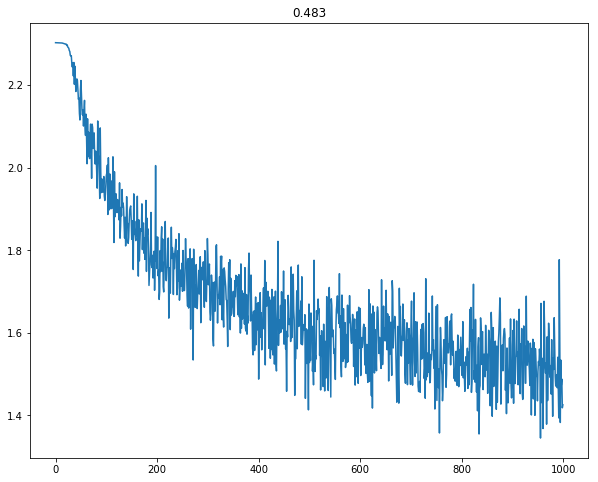

iteration 0 / 1000: loss 2.302746
iteration 100 / 1000: loss 1.977399
iteration 200 / 1000: loss 1.807076
iteration 300 / 1000: loss 1.750414
iteration 400 / 1000: loss 1.518052
iteration 500 / 1000: loss 1.595419
iteration 600 / 1000: loss 1.631397
iteration 700 / 1000: loss 1.578001
iteration 800 / 1000: loss 1.504926
iteration 900 / 1000: loss 1.612212


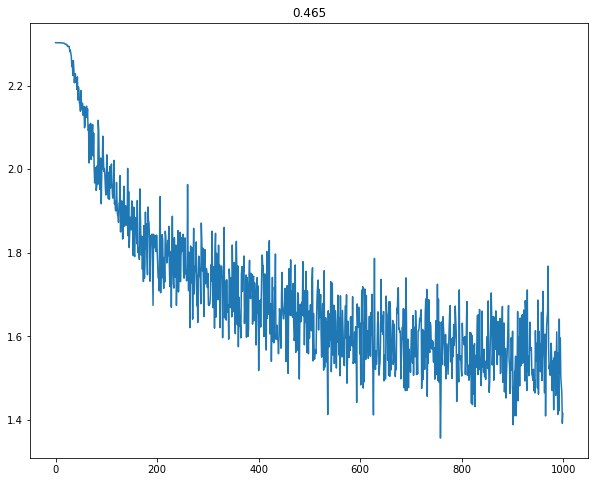

iteration 0 / 1000: loss 2.302891
iteration 100 / 1000: loss 1.976210
iteration 200 / 1000: loss 1.820676
iteration 300 / 1000: loss 1.677211
iteration 400 / 1000: loss 1.734670
iteration 500 / 1000: loss 1.716671
iteration 600 / 1000: loss 1.570223
iteration 700 / 1000: loss 1.621573
iteration 800 / 1000: loss 1.612049
iteration 900 / 1000: loss 1.481117


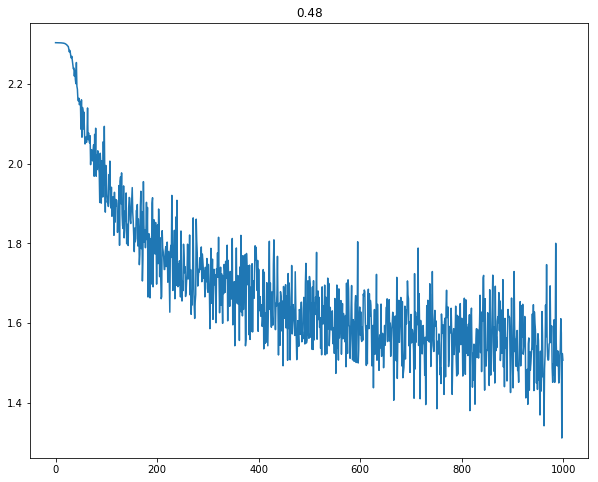

iteration 0 / 1000: loss 2.302888
iteration 100 / 1000: loss 2.041417
iteration 200 / 1000: loss 1.784531
iteration 300 / 1000: loss 1.612390
iteration 400 / 1000: loss 1.743805
iteration 500 / 1000: loss 1.686970
iteration 600 / 1000: loss 1.641511
iteration 700 / 1000: loss 1.626002
iteration 800 / 1000: loss 1.442201
iteration 900 / 1000: loss 1.597714


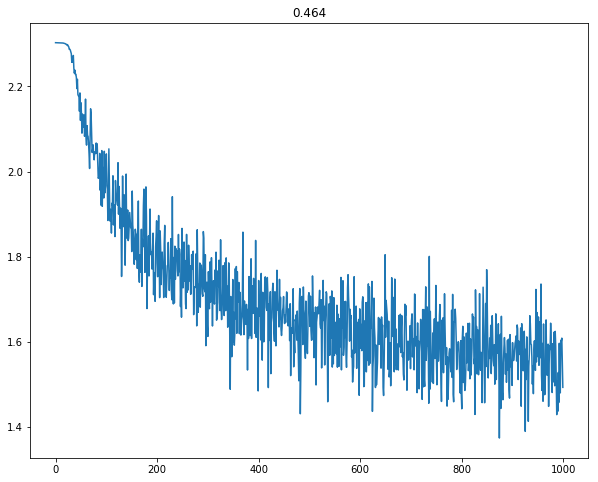

iteration 0 / 1000: loss 2.302897
iteration 100 / 1000: loss 1.982528
iteration 200 / 1000: loss 1.833925
iteration 300 / 1000: loss 1.835628
iteration 400 / 1000: loss 1.735097
iteration 500 / 1000: loss 1.718893
iteration 600 / 1000: loss 1.664109
iteration 700 / 1000: loss 1.523739
iteration 800 / 1000: loss 1.509028
iteration 900 / 1000: loss 1.630792


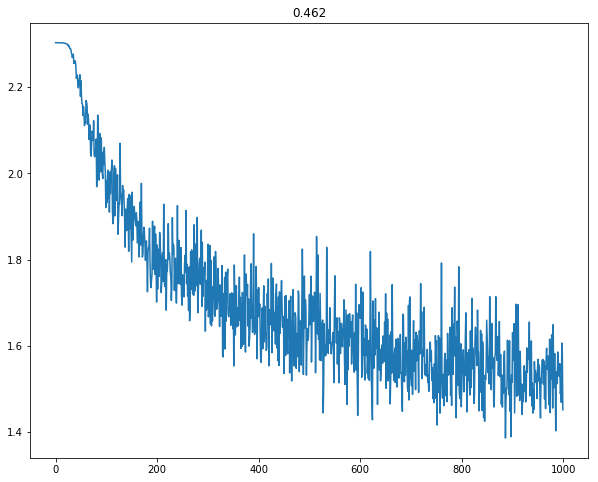

iteration 0 / 1000: loss 2.303001
iteration 100 / 1000: loss 1.915154
iteration 200 / 1000: loss 1.751084
iteration 300 / 1000: loss 1.633534
iteration 400 / 1000: loss 1.750306
iteration 500 / 1000: loss 1.553011
iteration 600 / 1000: loss 1.574215
iteration 700 / 1000: loss 1.494030
iteration 800 / 1000: loss 1.635867
iteration 900 / 1000: loss 1.643468


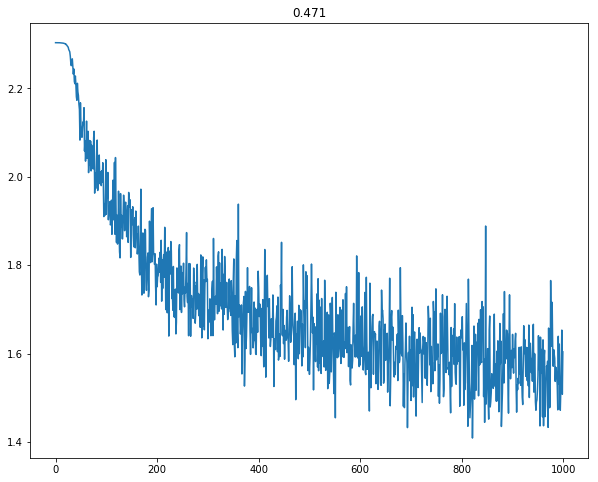

iteration 0 / 1000: loss 2.303029
iteration 100 / 1000: loss 2.056268
iteration 200 / 1000: loss 1.791382
iteration 300 / 1000: loss 1.655468
iteration 400 / 1000: loss 1.655485
iteration 500 / 1000: loss 1.648839
iteration 600 / 1000: loss 1.640726
iteration 700 / 1000: loss 1.666138
iteration 800 / 1000: loss 1.450073
iteration 900 / 1000: loss 1.658278


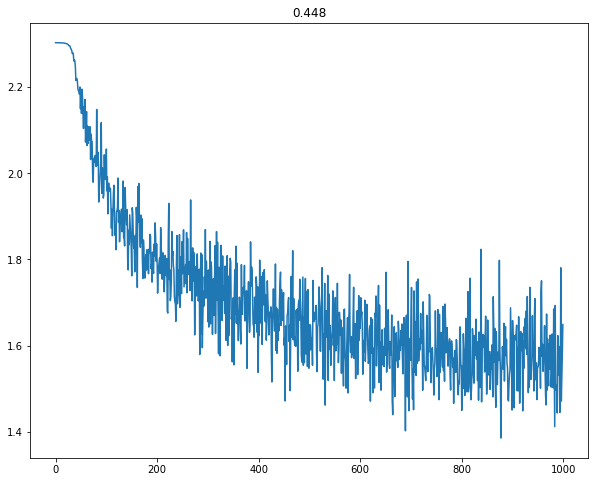

iteration 0 / 1000: loss 2.303004
iteration 100 / 1000: loss 2.016802
iteration 200 / 1000: loss 1.914883
iteration 300 / 1000: loss 1.682551
iteration 400 / 1000: loss 1.643685
iteration 500 / 1000: loss 1.588283
iteration 600 / 1000: loss 1.682814
iteration 700 / 1000: loss 1.619876
iteration 800 / 1000: loss 1.582386
iteration 900 / 1000: loss 1.568228


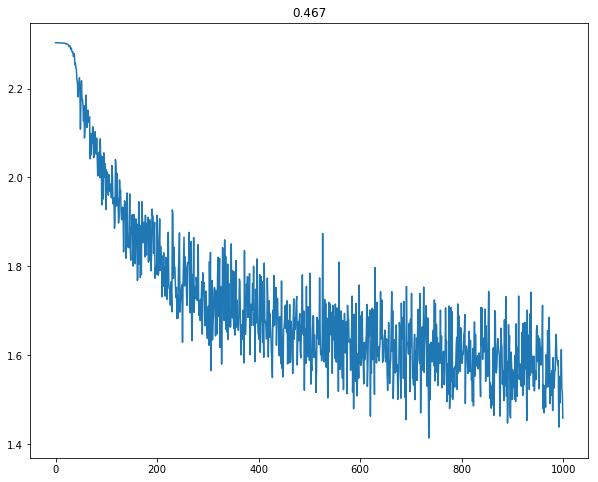

iteration 0 / 1000: loss 2.302824
iteration 100 / 1000: loss 2.043154
iteration 200 / 1000: loss 1.721488
iteration 300 / 1000: loss 1.692745
iteration 400 / 1000: loss 1.635635
iteration 500 / 1000: loss 1.516327
iteration 600 / 1000: loss 1.460706
iteration 700 / 1000: loss 1.538353
iteration 800 / 1000: loss 1.545633
iteration 900 / 1000: loss 1.527852


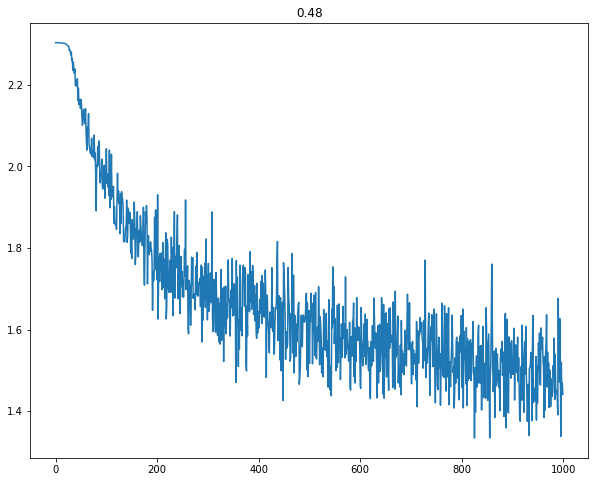

iteration 0 / 1000: loss 2.302810
iteration 100 / 1000: loss 1.954828
iteration 200 / 1000: loss 1.753955
iteration 300 / 1000: loss 1.627845
iteration 400 / 1000: loss 1.691144
iteration 500 / 1000: loss 1.642298
iteration 600 / 1000: loss 1.576589
iteration 700 / 1000: loss 1.498905
iteration 800 / 1000: loss 1.467702
iteration 900 / 1000: loss 1.622337


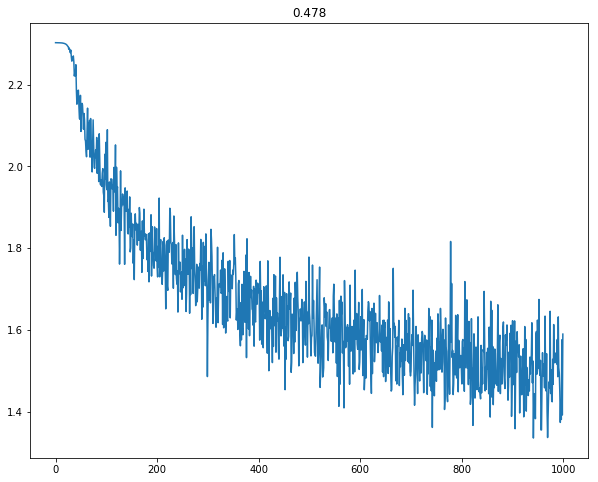

iteration 0 / 1000: loss 2.302812
iteration 100 / 1000: loss 1.994765
iteration 200 / 1000: loss 1.735586
iteration 300 / 1000: loss 1.636938
iteration 400 / 1000: loss 1.676598
iteration 500 / 1000: loss 1.693338
iteration 600 / 1000: loss 1.592076
iteration 700 / 1000: loss 1.528827
iteration 800 / 1000: loss 1.468388
iteration 900 / 1000: loss 1.522121


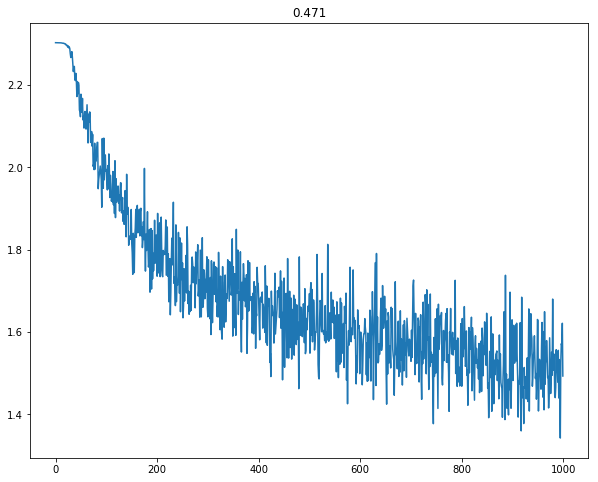

iteration 0 / 1000: loss 2.302964
iteration 100 / 1000: loss 1.903942
iteration 200 / 1000: loss 1.732516
iteration 300 / 1000: loss 1.648833
iteration 400 / 1000: loss 1.567574
iteration 500 / 1000: loss 1.581117
iteration 600 / 1000: loss 1.553861
iteration 700 / 1000: loss 1.574775
iteration 800 / 1000: loss 1.516666
iteration 900 / 1000: loss 1.496215


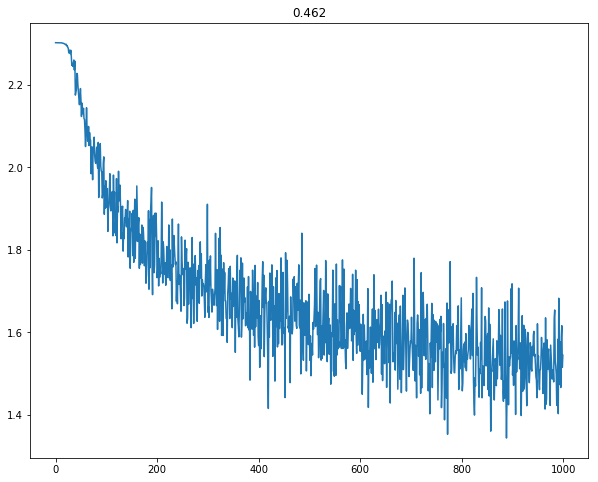

iteration 0 / 1000: loss 2.302994
iteration 100 / 1000: loss 1.913365
iteration 200 / 1000: loss 1.906532
iteration 300 / 1000: loss 1.664068
iteration 400 / 1000: loss 1.620537
iteration 500 / 1000: loss 1.756871
iteration 600 / 1000: loss 1.622270
iteration 700 / 1000: loss 1.546182
iteration 800 / 1000: loss 1.519684
iteration 900 / 1000: loss 1.551684


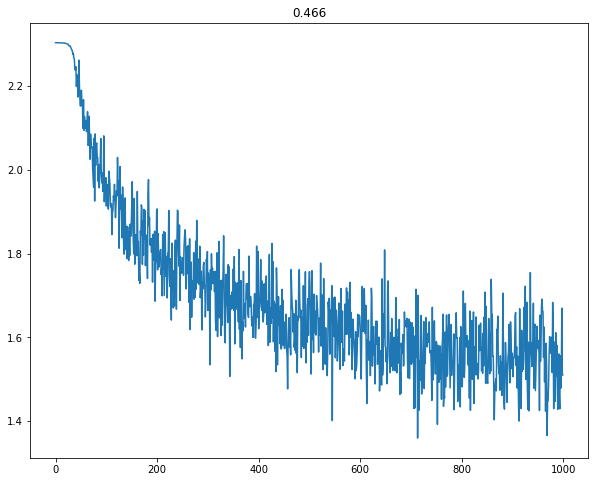

iteration 0 / 1000: loss 2.302950
iteration 100 / 1000: loss 1.892923
iteration 200 / 1000: loss 1.807510
iteration 300 / 1000: loss 1.722883
iteration 400 / 1000: loss 1.653572
iteration 500 / 1000: loss 1.645945
iteration 600 / 1000: loss 1.575715
iteration 700 / 1000: loss 1.593442
iteration 800 / 1000: loss 1.549484
iteration 900 / 1000: loss 1.610509


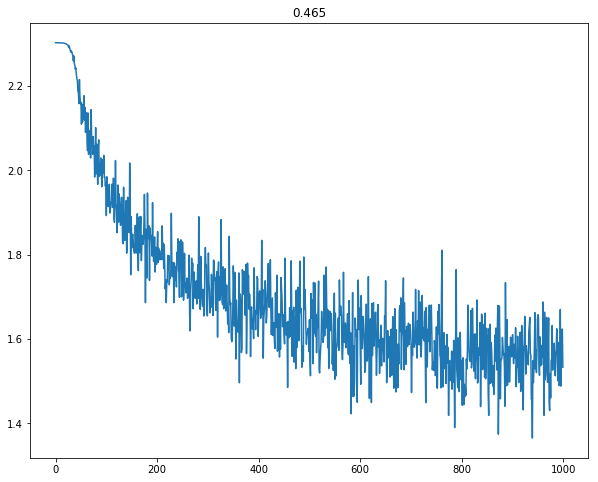

iteration 0 / 1000: loss 2.303121
iteration 100 / 1000: loss 1.944189
iteration 200 / 1000: loss 1.882602
iteration 300 / 1000: loss 1.775107
iteration 400 / 1000: loss 1.636481
iteration 500 / 1000: loss 1.582207
iteration 600 / 1000: loss 1.619639
iteration 700 / 1000: loss 1.700854
iteration 800 / 1000: loss 1.584402
iteration 900 / 1000: loss 1.497651


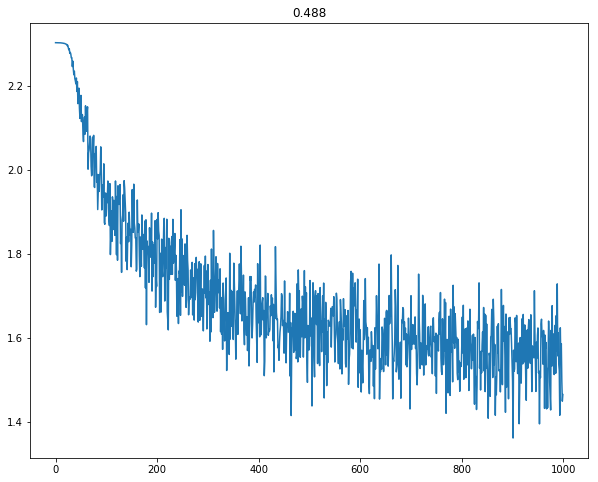

iteration 0 / 1000: loss 2.303111
iteration 100 / 1000: loss 1.981107
iteration 200 / 1000: loss 1.891377
iteration 300 / 1000: loss 1.786118
iteration 400 / 1000: loss 1.695567
iteration 500 / 1000: loss 1.622404
iteration 600 / 1000: loss 1.708901
iteration 700 / 1000: loss 1.489839
iteration 800 / 1000: loss 1.540093
iteration 900 / 1000: loss 1.603380


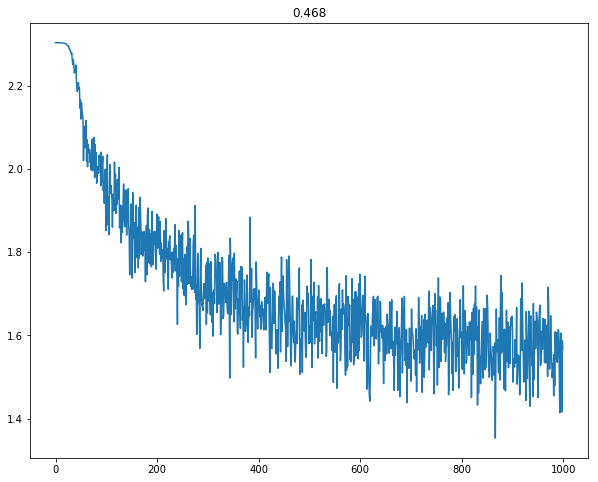

iteration 0 / 1000: loss 2.303136
iteration 100 / 1000: loss 1.895144
iteration 200 / 1000: loss 1.829270
iteration 300 / 1000: loss 1.638182
iteration 400 / 1000: loss 1.685487
iteration 500 / 1000: loss 1.680988
iteration 600 / 1000: loss 1.614473
iteration 700 / 1000: loss 1.484864
iteration 800 / 1000: loss 1.553959
iteration 900 / 1000: loss 1.594374


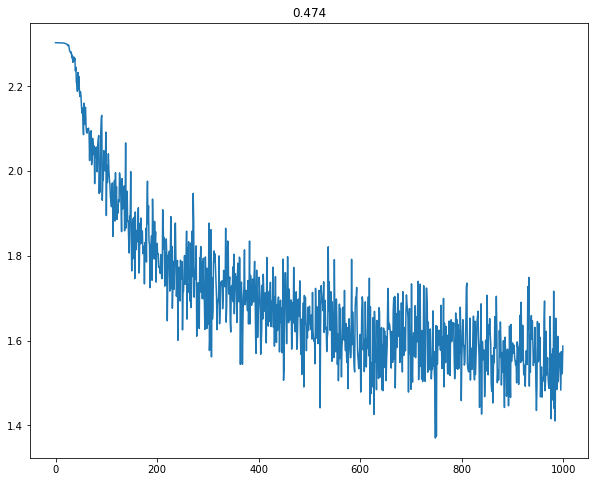

iteration 0 / 1000: loss 2.302852
iteration 100 / 1000: loss 1.899402
iteration 200 / 1000: loss 1.808277
iteration 300 / 1000: loss 1.683888
iteration 400 / 1000: loss 1.575456
iteration 500 / 1000: loss 1.497691
iteration 600 / 1000: loss 1.529970
iteration 700 / 1000: loss 1.529245
iteration 800 / 1000: loss 1.547846
iteration 900 / 1000: loss 1.429601


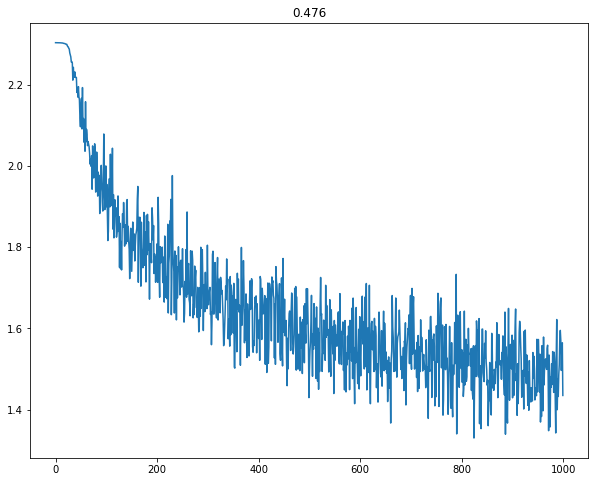

iteration 0 / 1000: loss 2.302846
iteration 100 / 1000: loss 1.901345
iteration 200 / 1000: loss 1.760069
iteration 300 / 1000: loss 1.596275
iteration 400 / 1000: loss 1.626888
iteration 500 / 1000: loss 1.548360
iteration 600 / 1000: loss 1.540546
iteration 700 / 1000: loss 1.529282
iteration 800 / 1000: loss 1.474394
iteration 900 / 1000: loss 1.440431


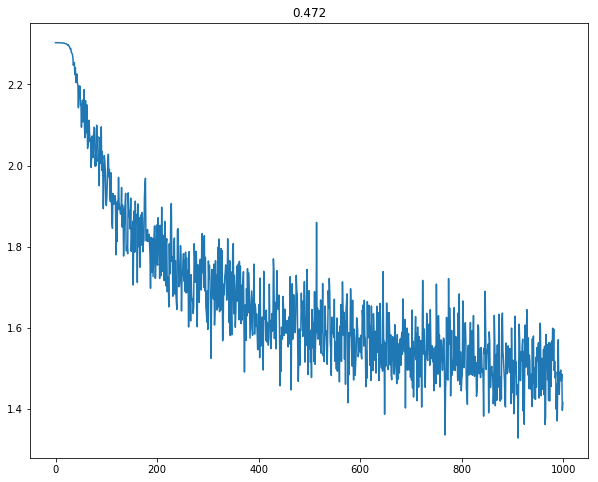

iteration 0 / 1000: loss 2.302839
iteration 100 / 1000: loss 2.039330
iteration 200 / 1000: loss 1.733009
iteration 300 / 1000: loss 1.576626
iteration 400 / 1000: loss 1.651310
iteration 500 / 1000: loss 1.657171
iteration 600 / 1000: loss 1.649809
iteration 700 / 1000: loss 1.569645
iteration 800 / 1000: loss 1.598361
iteration 900 / 1000: loss 1.537808


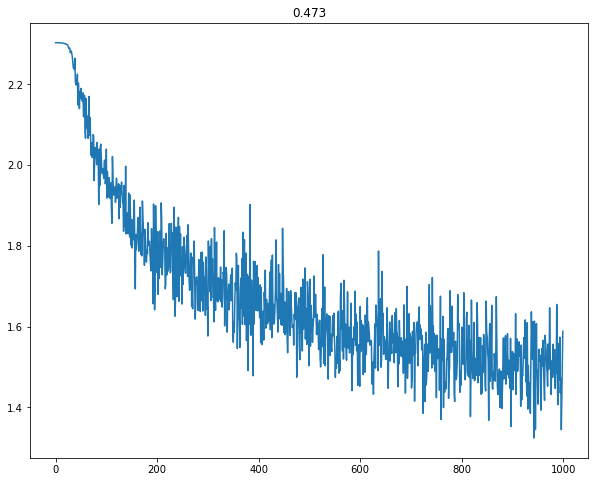

iteration 0 / 1000: loss 2.303060
iteration 100 / 1000: loss 1.945629
iteration 200 / 1000: loss 1.775930
iteration 300 / 1000: loss 1.643709
iteration 400 / 1000: loss 1.736708
iteration 500 / 1000: loss 1.618245
iteration 600 / 1000: loss 1.628145
iteration 700 / 1000: loss 1.640583
iteration 800 / 1000: loss 1.643118
iteration 900 / 1000: loss 1.429487


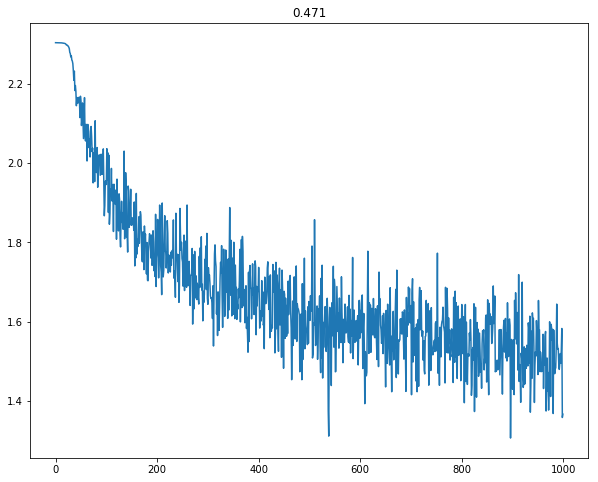

iteration 0 / 1000: loss 2.303059
iteration 100 / 1000: loss 2.016909
iteration 200 / 1000: loss 1.773493
iteration 300 / 1000: loss 1.683967
iteration 400 / 1000: loss 1.662141
iteration 500 / 1000: loss 1.545973
iteration 600 / 1000: loss 1.507726
iteration 700 / 1000: loss 1.573627
iteration 800 / 1000: loss 1.700013
iteration 900 / 1000: loss 1.720895


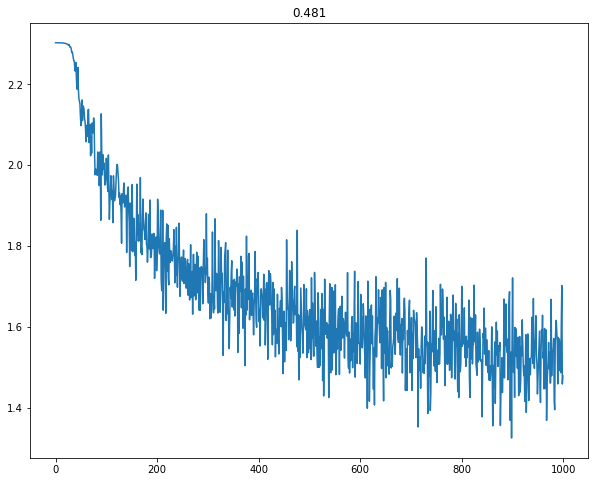

iteration 0 / 1000: loss 2.303024
iteration 100 / 1000: loss 2.000969
iteration 200 / 1000: loss 1.881953
iteration 300 / 1000: loss 1.693730
iteration 400 / 1000: loss 1.627268
iteration 500 / 1000: loss 1.749691
iteration 600 / 1000: loss 1.579469
iteration 700 / 1000: loss 1.748767
iteration 800 / 1000: loss 1.447904
iteration 900 / 1000: loss 1.481759


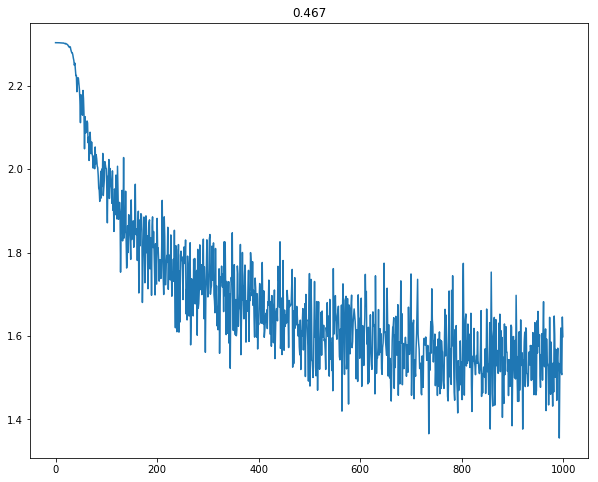

iteration 0 / 1000: loss 2.303235
iteration 100 / 1000: loss 1.924642
iteration 200 / 1000: loss 1.724987
iteration 300 / 1000: loss 1.778248
iteration 400 / 1000: loss 1.638265
iteration 500 / 1000: loss 1.616295
iteration 600 / 1000: loss 1.578399
iteration 700 / 1000: loss 1.545971
iteration 800 / 1000: loss 1.523794
iteration 900 / 1000: loss 1.620709


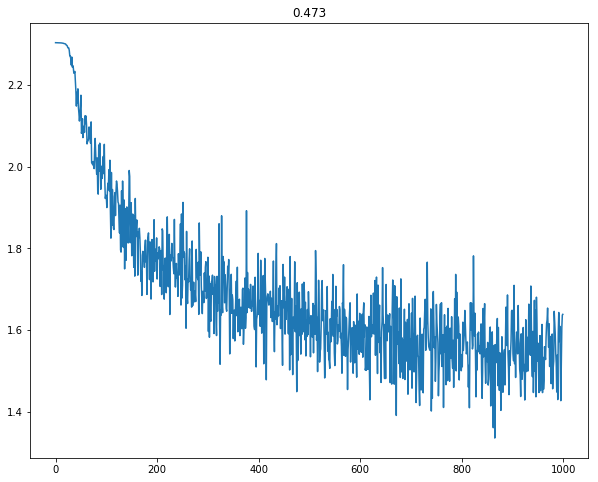

iteration 0 / 1000: loss 2.303206
iteration 100 / 1000: loss 2.043953
iteration 200 / 1000: loss 1.898805
iteration 300 / 1000: loss 1.728812
iteration 400 / 1000: loss 1.659598
iteration 500 / 1000: loss 1.571324
iteration 600 / 1000: loss 1.601181
iteration 700 / 1000: loss 1.635913
iteration 800 / 1000: loss 1.535580
iteration 900 / 1000: loss 1.615060


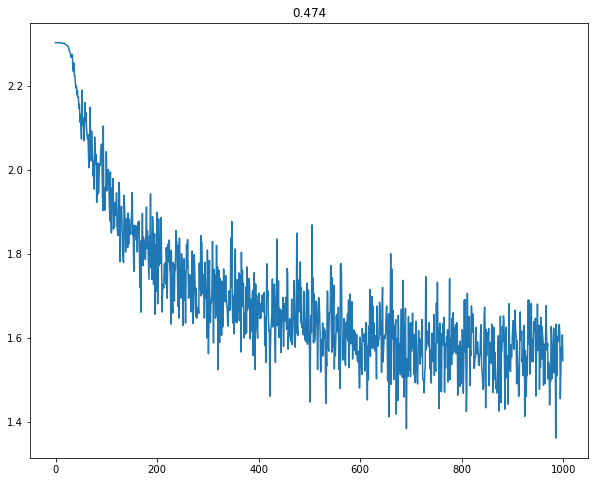

iteration 0 / 1000: loss 2.303235
iteration 100 / 1000: loss 1.911445
iteration 200 / 1000: loss 1.862776
iteration 300 / 1000: loss 1.694522
iteration 400 / 1000: loss 1.648325
iteration 500 / 1000: loss 1.584302
iteration 600 / 1000: loss 1.714490
iteration 700 / 1000: loss 1.601572
iteration 800 / 1000: loss 1.478696
iteration 900 / 1000: loss 1.618005


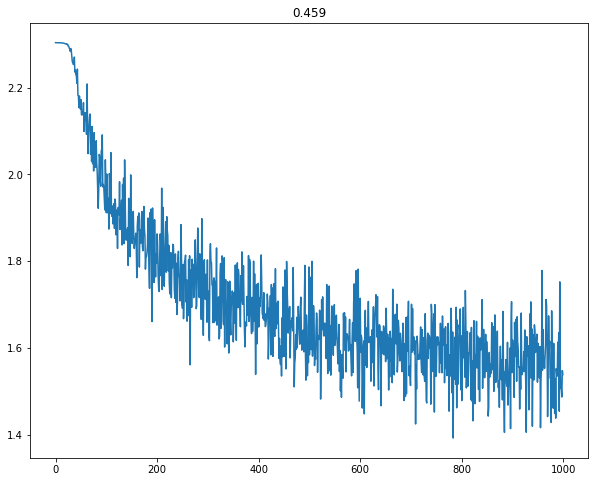

In [36]:
best_net = None # store the best model into this
best_val = 0
bestcomb = {}
input_size = 32 * 32 * 3
num_classes = 10
i = 1
alp_list = [3e-5,1e-4,3e-4,1e-3]
hidlist = [40,50,60]
reg = [0.15,0.25,0.35]
decay_list = [0.95,0.9,0.85]
for comb in it.product(alp_list, hidlist, reg, decay_list):
    net = TwoLayerNet(input_size, comb[1], num_classes)

# Train the network
    stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=comb[0], learning_rate_decay=comb[3],
            reg=comb[2], verbose=True)
    plt.plot(stats['loss_history'])
    val_acc = np.mean(net.predict(X_val) == y_val)
    plt.title(val_acc)
    plt.show()
    if val_acc > best_val:
        best_val = val_acc
        best_net = net
        bestcomb = {'alp': comb[0], 'hid': comb[1], 'reg':comb[2], 'decay':comb[3], 'acc':val_acc}
    i += 1
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
pass
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

In [37]:
bestcomb

{'acc': 0.48799999999999999,
 'alp': 0.001,
 'decay': 0.95,
 'hid': 50,
 'reg': 0.35}

In [40]:
(best_net.predict(X_val) == y_val).mean()

0.48799999999999999

In [39]:
test_net = TwoLayerNet(input_size, bestcomb['hid'], num_classes)

# Train the network
stats = test_net.train(X_train, y_train, X_val, y_val,
        num_iters=1000, batch_size=200,
        learning_rate=bestcomb['alp'], learning_rate_decay=bestcomb['decay'],
        reg=bestcomb['reg'], verbose=True)
(test_net.predict(X_val) == y_val).mean()

iteration 0 / 1000: loss 1.349991
iteration 100 / 1000: loss 1.509581
iteration 200 / 1000: loss 1.544577
iteration 300 / 1000: loss 1.449072
iteration 400 / 1000: loss 1.372156
iteration 500 / 1000: loss 1.456357
iteration 600 / 1000: loss 1.524450
iteration 700 / 1000: loss 1.395820
iteration 800 / 1000: loss 1.469564
iteration 900 / 1000: loss 1.467527


0.10199999999999999

In [ ]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [ ]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)